In [2235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2236]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import RFE

In [2237]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot

#from scipy import stats

# Step 1: Reading and Understanding the Data

In [2238]:
df_bike = pd.read_csv('day.csv')
df_bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [2239]:
df_bike.shape

(730, 16)

In [2240]:
# There are 730 rows and 16 columns in the data set

In [2241]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [2242]:
df_bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [2243]:
# There are no null values present in the data

In [2244]:
df_bike[df_bike.duplicated()]

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [2245]:
# There are no duplicate rows

In [2246]:
df_bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [2247]:
# we can drop instant and dteday columns as these columns seems insignificant

In [2248]:
df_bike.drop(['instant','dteday'],axis=1,inplace=True)

In [2249]:
(df_bike['casual']+df_bike['registered'])[0:5]

0     985
1     801
2    1349
3    1562
4    1600
dtype: int64

In [2250]:
df_bike['cnt'].head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [2251]:
# We can see the casual+registered = cnt so we can drop these columns as well

In [2252]:
df_bike.drop(['casual','registered'],axis=1,inplace=True)

In [2253]:
df_bike.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    7.506729    8.150308   14.237589    5.195841  1936.011647  
min      1.000000    2.424346    3.953480    0.000000    1.500244    22.000000  
25%      1.000000   13.811885   16.889713   52.000000    9.041650  3169.750000  
50%      1.000000   20.465826   24.368225   62.625000   12.125325  4548.500000  
75%      2.000000   26.880615   30.445775   72.989575   15.625589  5966.000000  
max      3.000000   35.328347   42.044800   97.250000   34.000021  8714.000000

In [2254]:
# columns seems to be little skewed.

In [2255]:
# Spliting the numerical column and categorical

In [2256]:
df_bike_num = df_bike.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'],axis=1)
df_bike_cat = df_bike[['season','yr','mnth','holiday','weekday','workingday','weathersit']]

# Step 2: Visualising the Data

### For Numerical columns

In [2257]:
df_bike_num.skew()

temp        -0.057187
atemp       -0.133709
hum         -0.067476
windspeed    0.676314
cnt         -0.049581
dtype: float64

In [2258]:
#windspeed columns seems to right little skewed

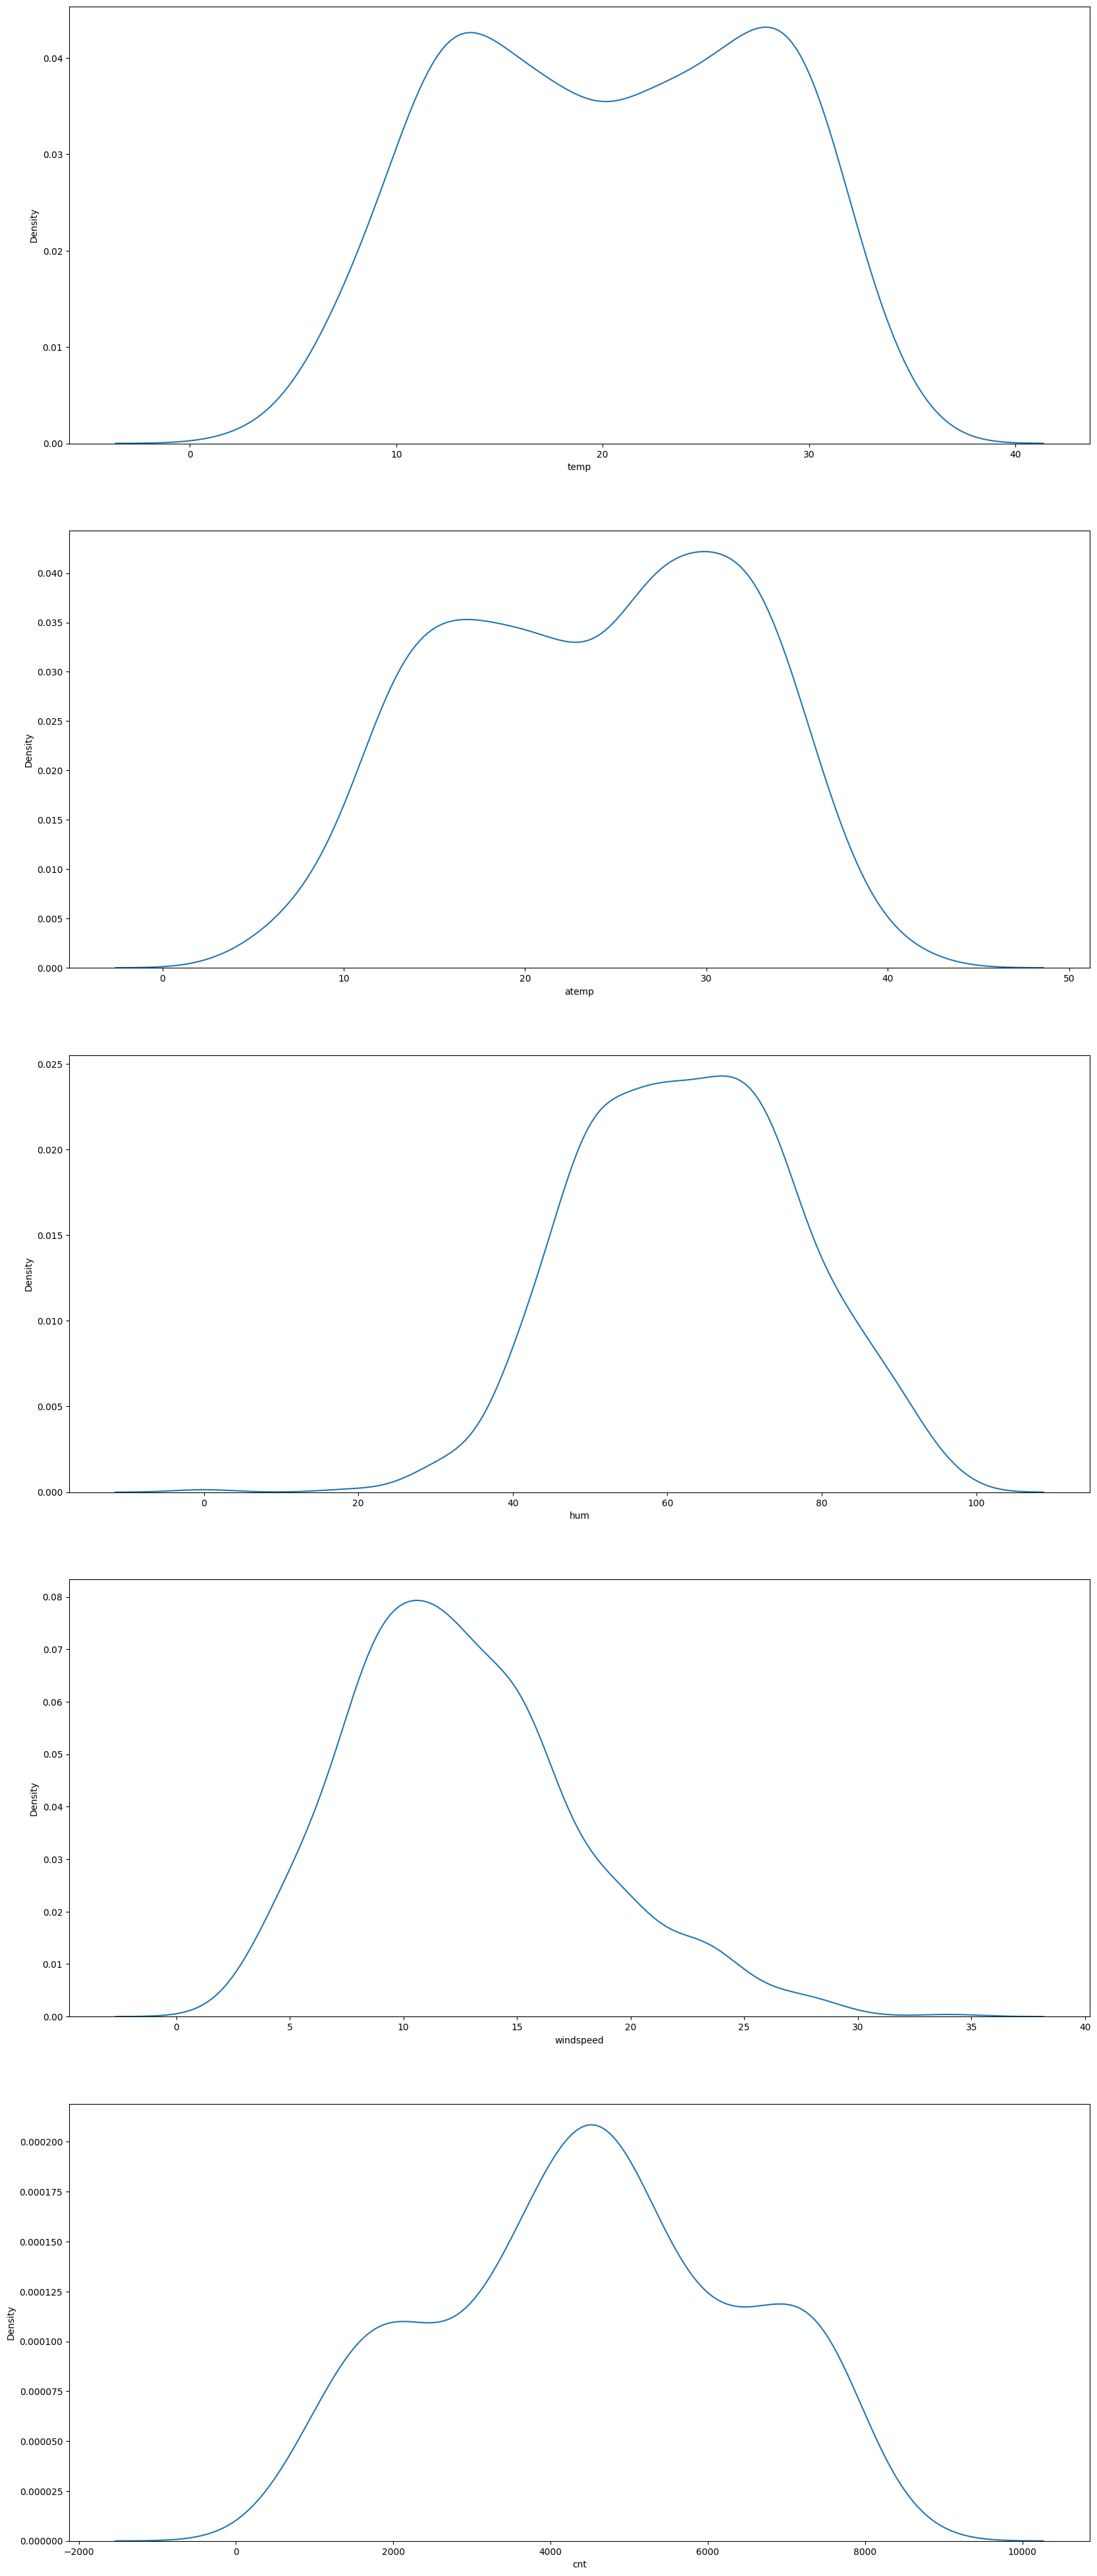

In [2259]:
col = df_bike_num.columns
plt.figure(figsize=(20,50))
for i in range(col.shape[0]):
    plt.subplot(col.shape[0],1,i+1)
    sns.kdeplot(df_bike_num[col[i]])
    plt.xlabel(col[i])
plt.show()
    

In [2260]:
# Outlier detection

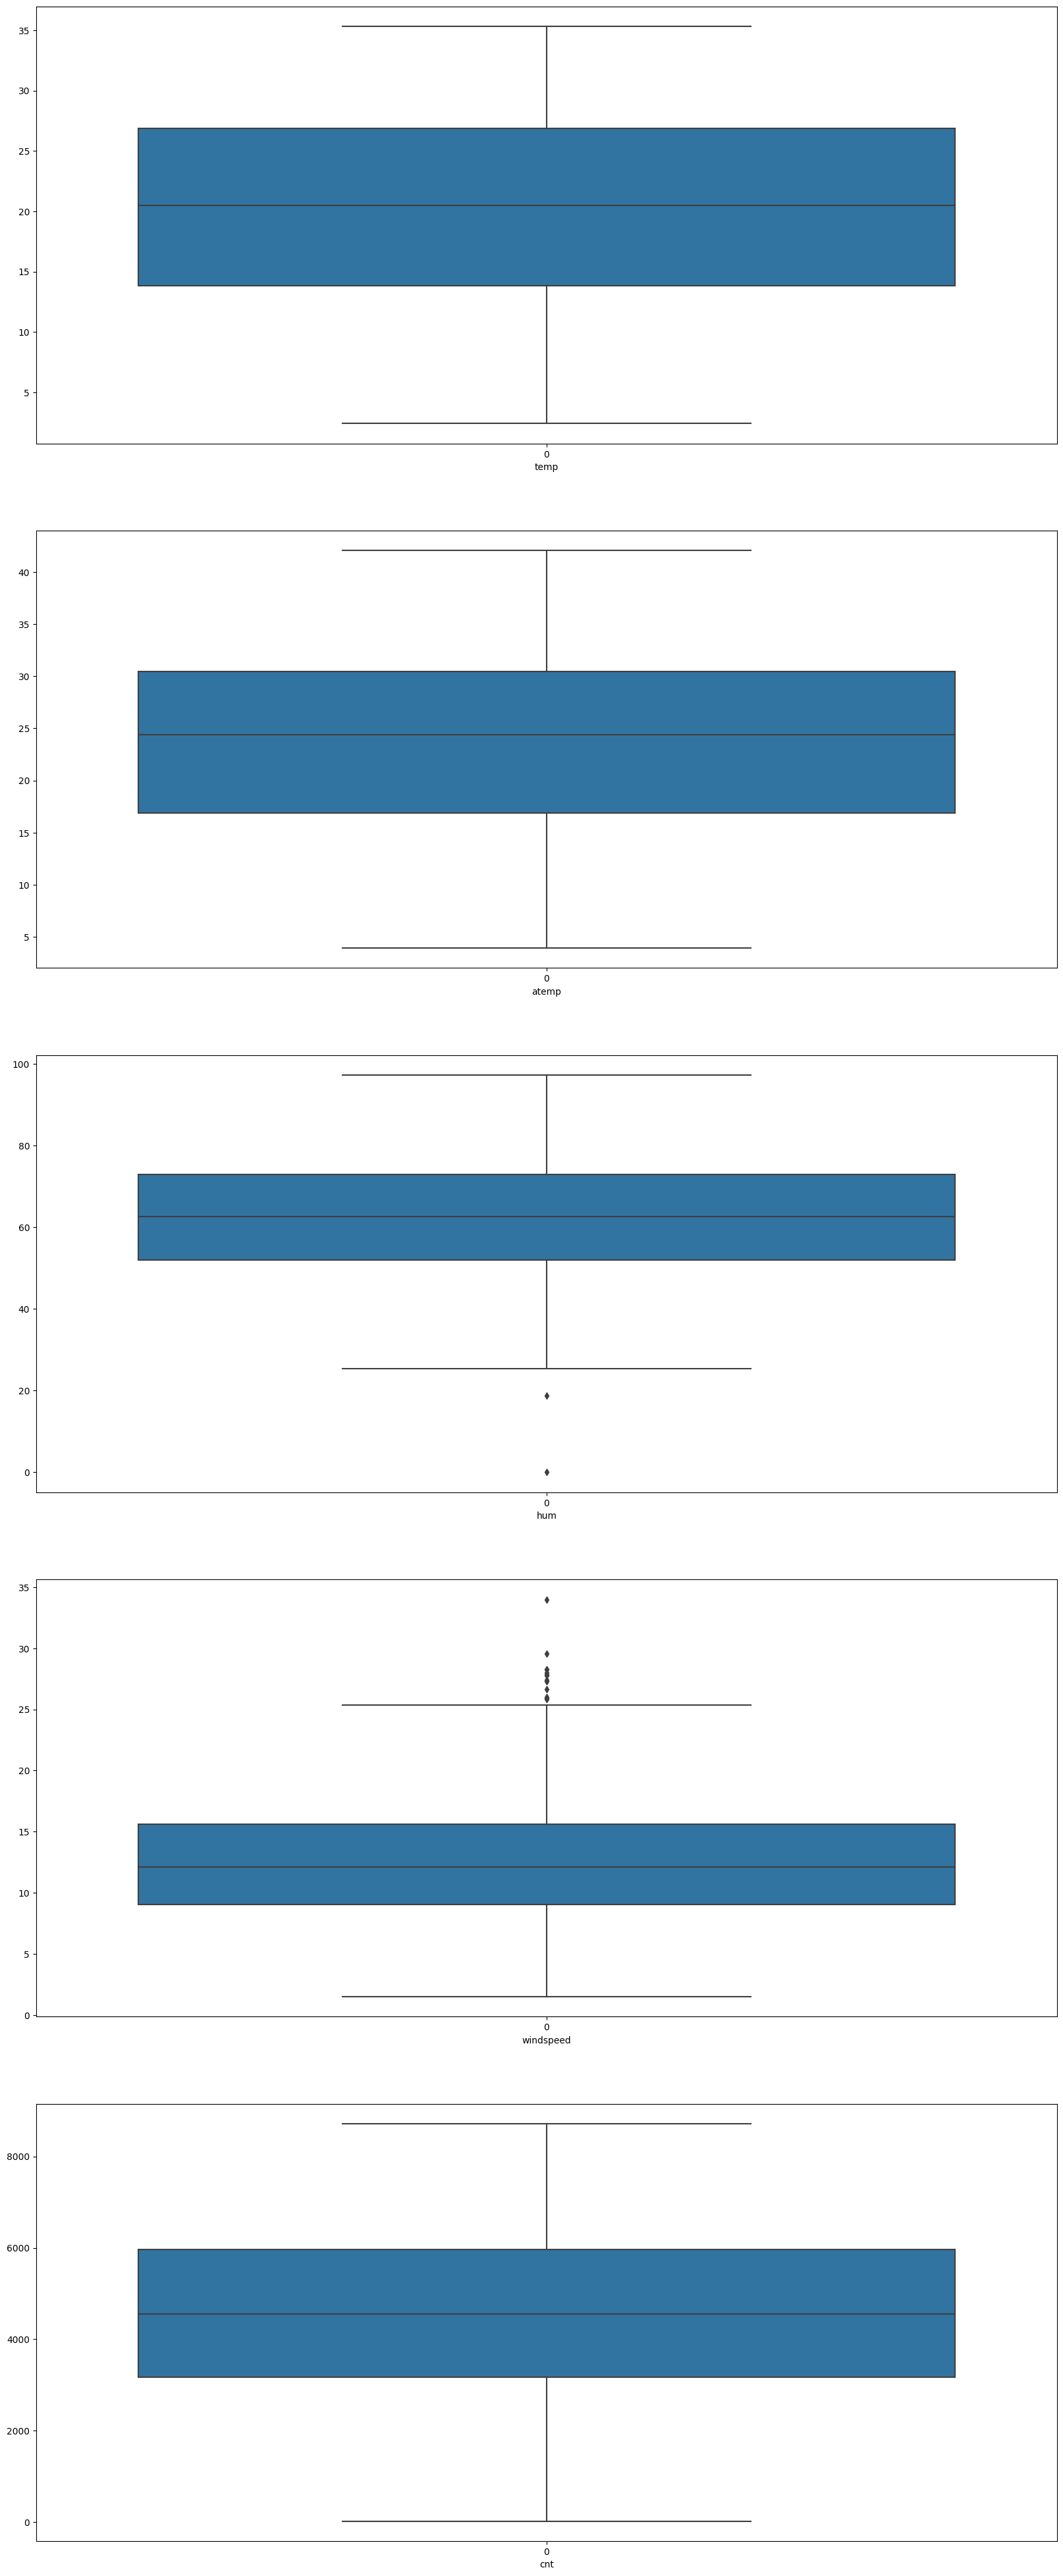

In [2261]:
col = df_bike_num.columns
plt.figure(figsize=(20,50))
for i in range(col.shape[0]):
    plt.subplot(col.shape[0],1,i+1)
    sns.boxplot(df_bike_num[col[i]])
    plt.xlabel(col[i])
plt.show()
    

In [2262]:
# There very less outliers present in the dataset for columns for windspeed and hum so we can ignore them as of now.

### for categorical column

In [2263]:
# changing the numerical label into categorical string as these label does not make sense

In [2264]:
df_bike_cat.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [2265]:
for i in df_bike_cat.columns:
    print("**********************************")
    print(i)
    print(df_bike_cat[i].value_counts())

**********************************
season
3    188
2    184
1    180
4    178
Name: season, dtype: int64
**********************************
yr
0    365
1    365
Name: yr, dtype: int64
**********************************
mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
**********************************
holiday
0    709
1     21
Name: holiday, dtype: int64
**********************************
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
**********************************
workingday
1    499
0    231
Name: workingday, dtype: int64
**********************************
weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64


In [2266]:
df_bike_cat['season'].replace({1:'Spring',2:'summer',3:'fall',4:'winter'},inplace=True)
df_bike_cat['weekday'].replace({0:'sun',1:'mon',2:'tues',3:'wed',4:'thur',5:'fri',6:'sat'},inplace=True)
df_bike_cat['mnth'].replace({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul'
                            ,8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
df_bike_cat['weathersit'].replace({1:'good',2:'moderate',3:'bad'},inplace=True)

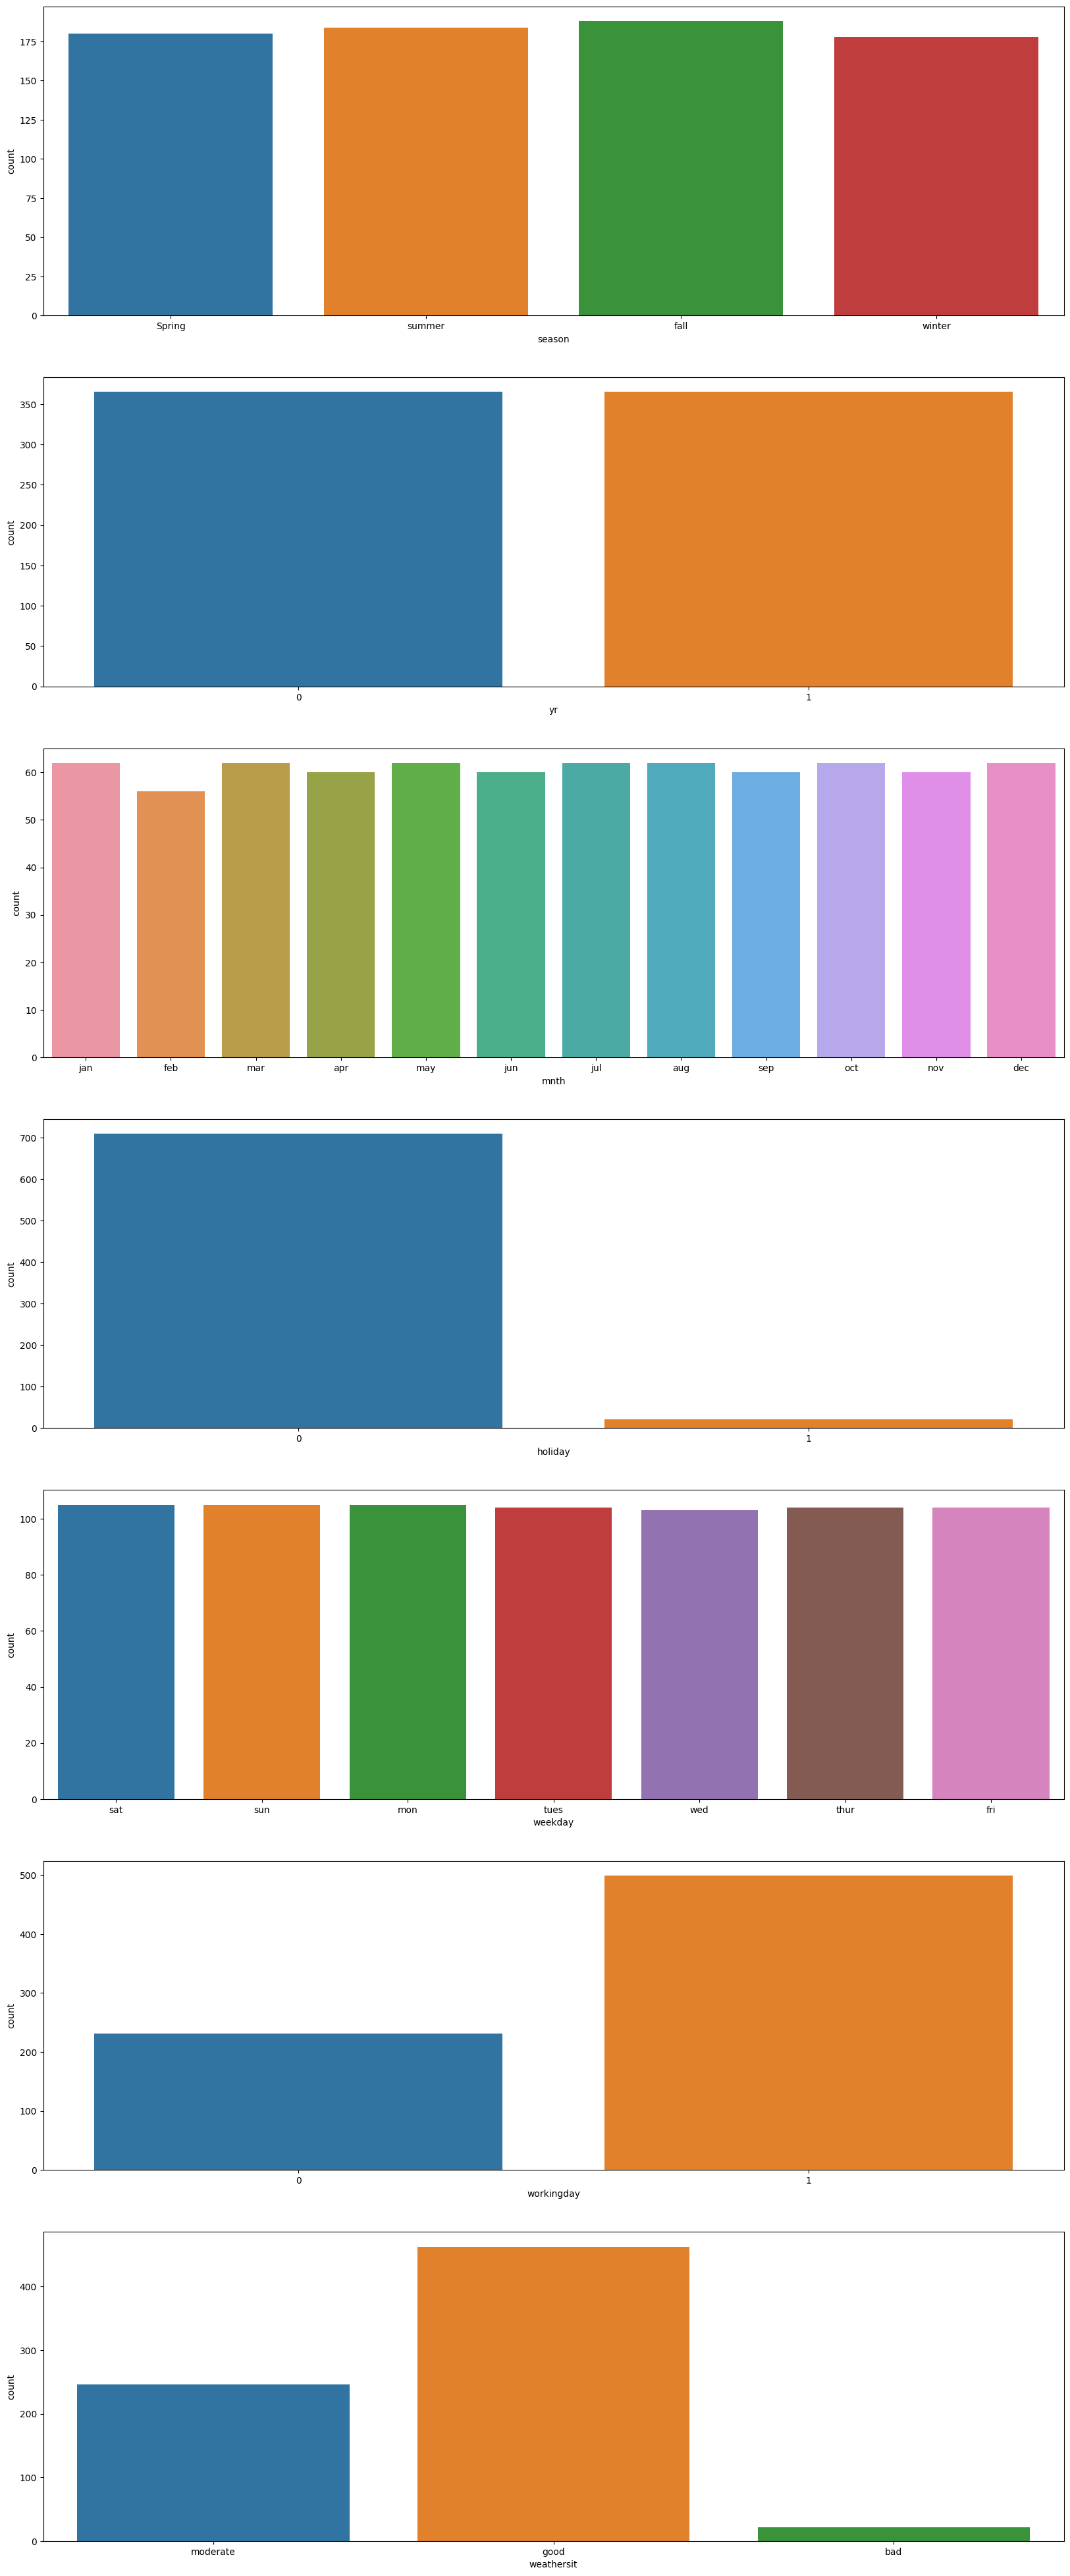

In [2267]:
col = df_bike_cat.columns
plt.figure(figsize=(20,50))
for i in range(col.shape[0]):
    plt.subplot(col.shape[0],1,i+1)
    sns.countplot(x = df_bike_cat[col[i]])
    plt.xlabel(col[i])
plt.show()
    

In [2268]:
# As we can see that there is huge data imbalance for working and holiday columns respectively 
# and it is expected as working day will be more compare to non working day
# Holiday will be very less as compared to non holiday

In [2269]:
df_bike_new = pd.concat([df_bike_num,df_bike_cat],axis=1)
df_bike_new.head()

temp     atemp      hum  windspeed   cnt  season  yr mnth  holiday  \
0  14.110847  18.18125  80.5833  10.749882   985  Spring   0  jan        0   
1  14.902598  17.68695  69.6087  16.652113   801  Spring   0  jan        0   
2   8.050924   9.47025  43.7273  16.636703  1349  Spring   0  jan        0   
3   8.200000  10.60610  59.0435  10.739832  1562  Spring   0  jan        0   
4   9.305237  11.46350  43.6957  12.522300  1600  Spring   0  jan        0   

  weekday  workingday weathersit  
0     sat           0   moderate  
1     sun           0   moderate  
2     mon           1       good  
3    tues           1       good  
4     wed           1       good

In [2270]:
def plot_cat_with_target(column):
    plt.figure(figsize = (15,8))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df_bike_new)
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df_bike_new, hue='yr',palette='tab10')
    plt.legend(labels=['2018', '2019'])
    plt.tight_layout()
    plt.show()

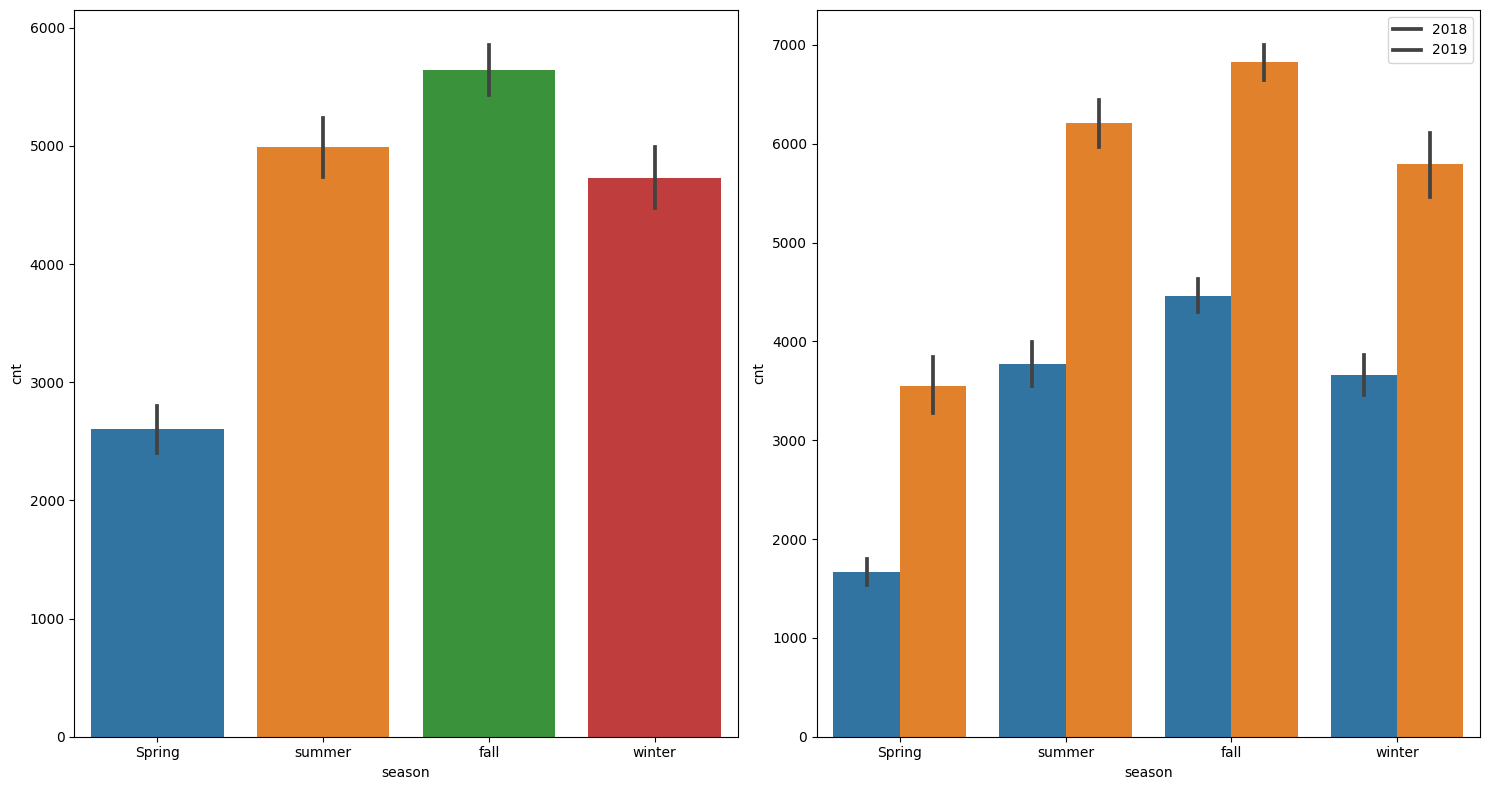

In [2271]:
plot_cat_with_target('season')

In [2272]:
# We can see that Fall Season seems to have attracted more booking as compared to other season
# also in each season the booking count has increased exceptionally from 2018 to 2019.

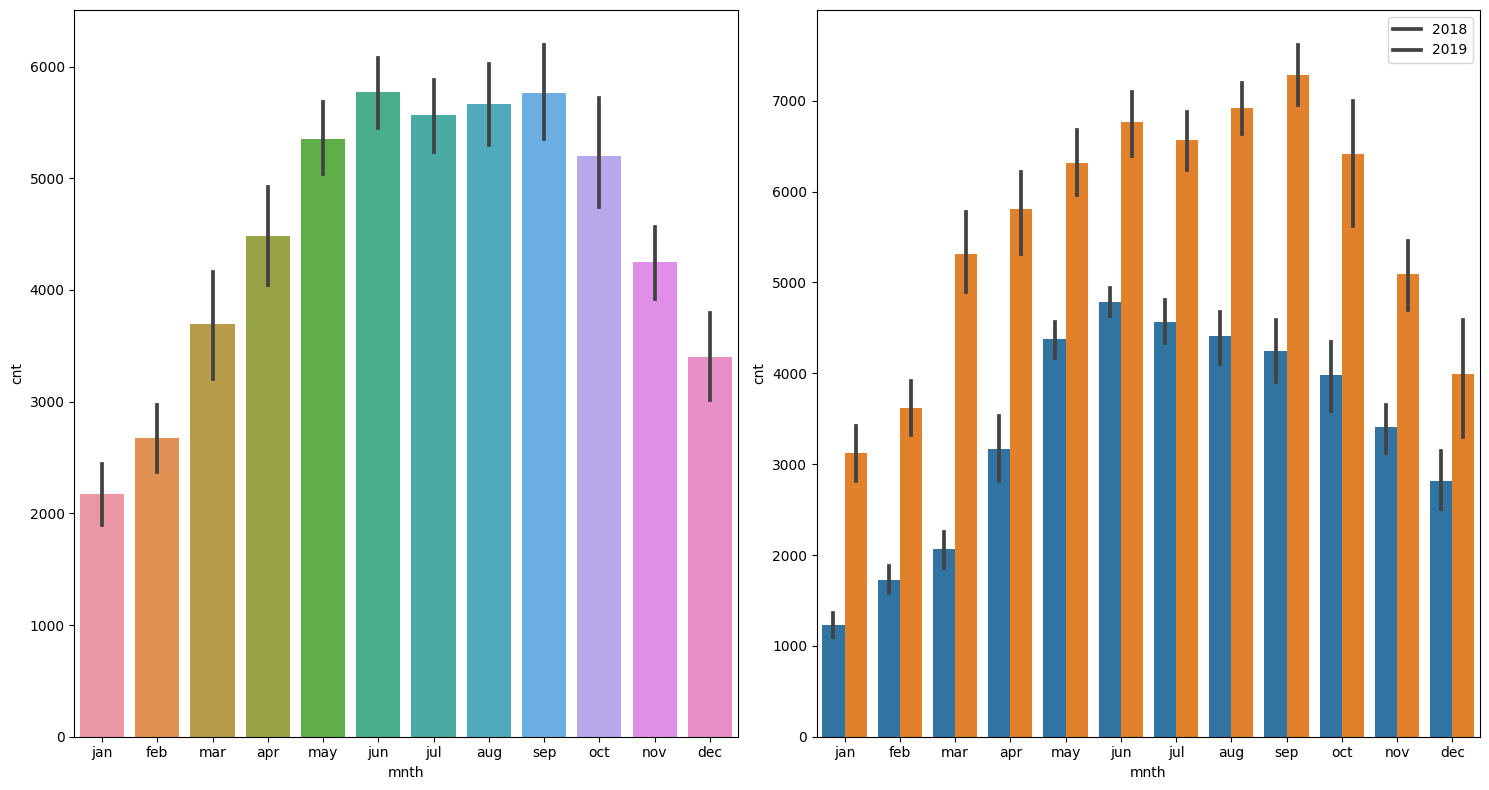

In [2273]:
plot_cat_with_target('mnth')

In [2274]:
# Most of booking done in the month between may to oct and we can see that it also increasing exceptionally
# from 2018 to 2019.

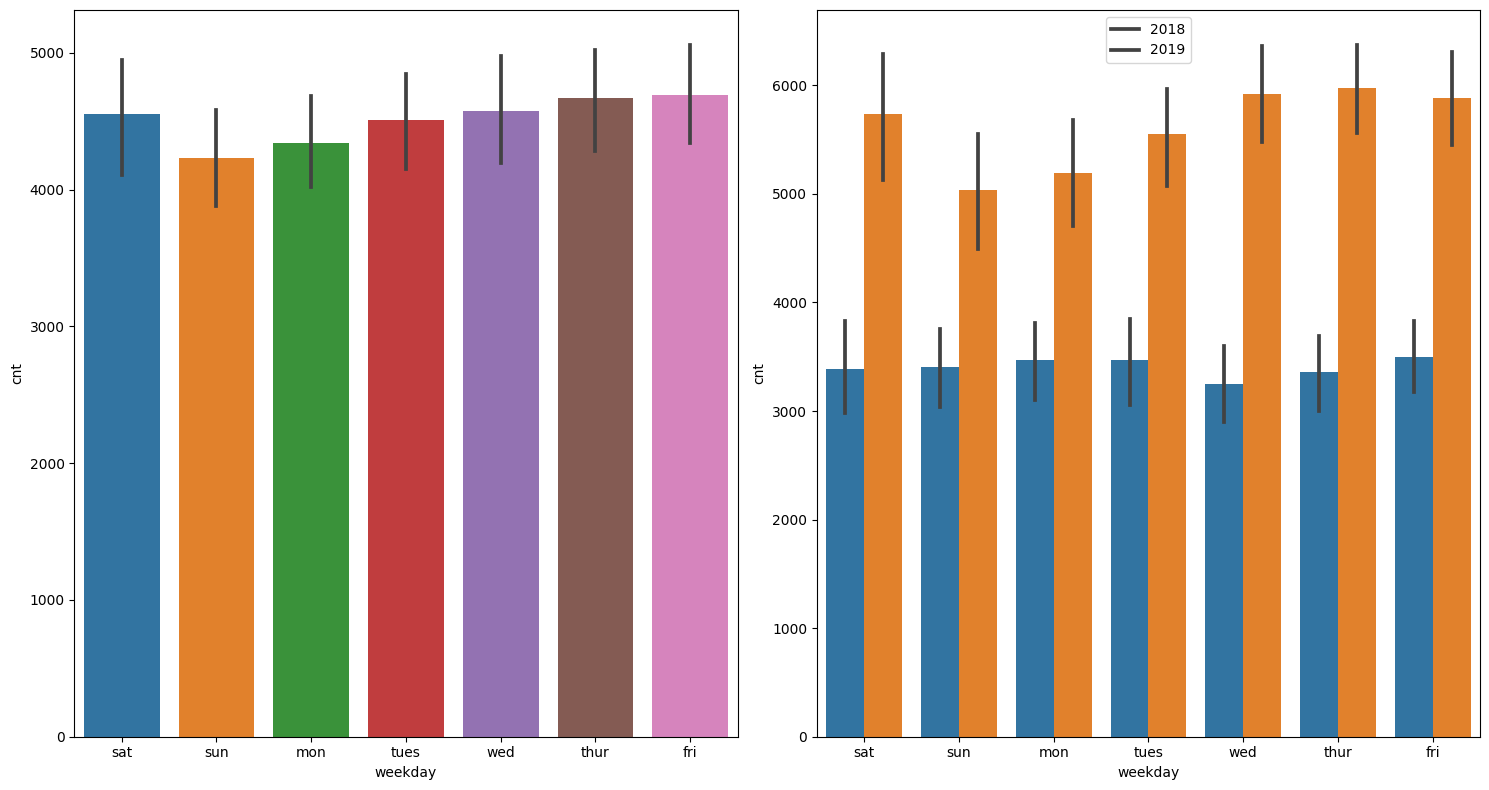

In [2275]:
plot_cat_with_target('weekday')

In [2276]:
#Thursday Friday and Saturday attrach more people hence booking is more in these days.

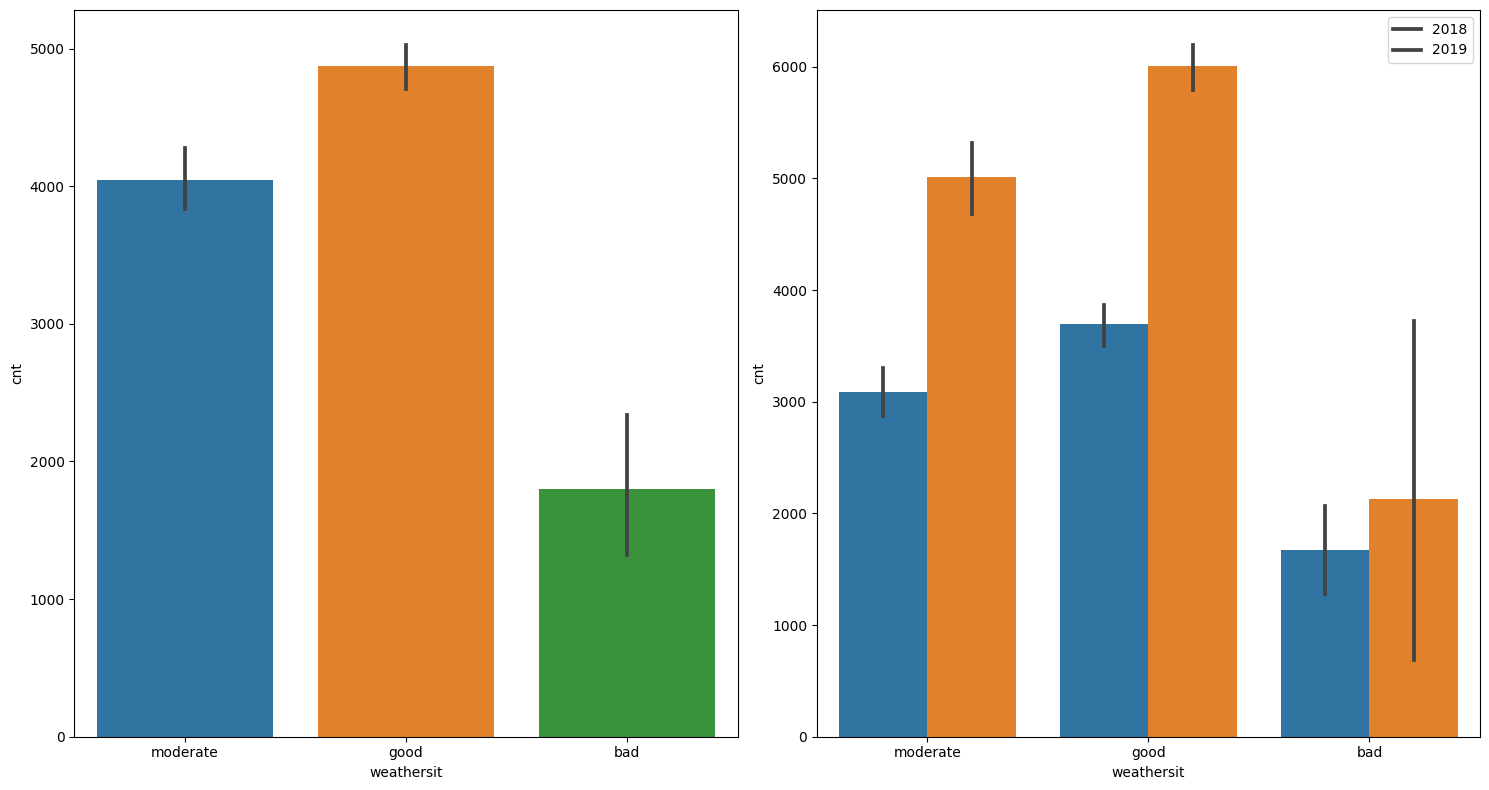

In [2277]:
plot_cat_with_target('weathersit')

In [2278]:
# It seems clear whether attrach more people.

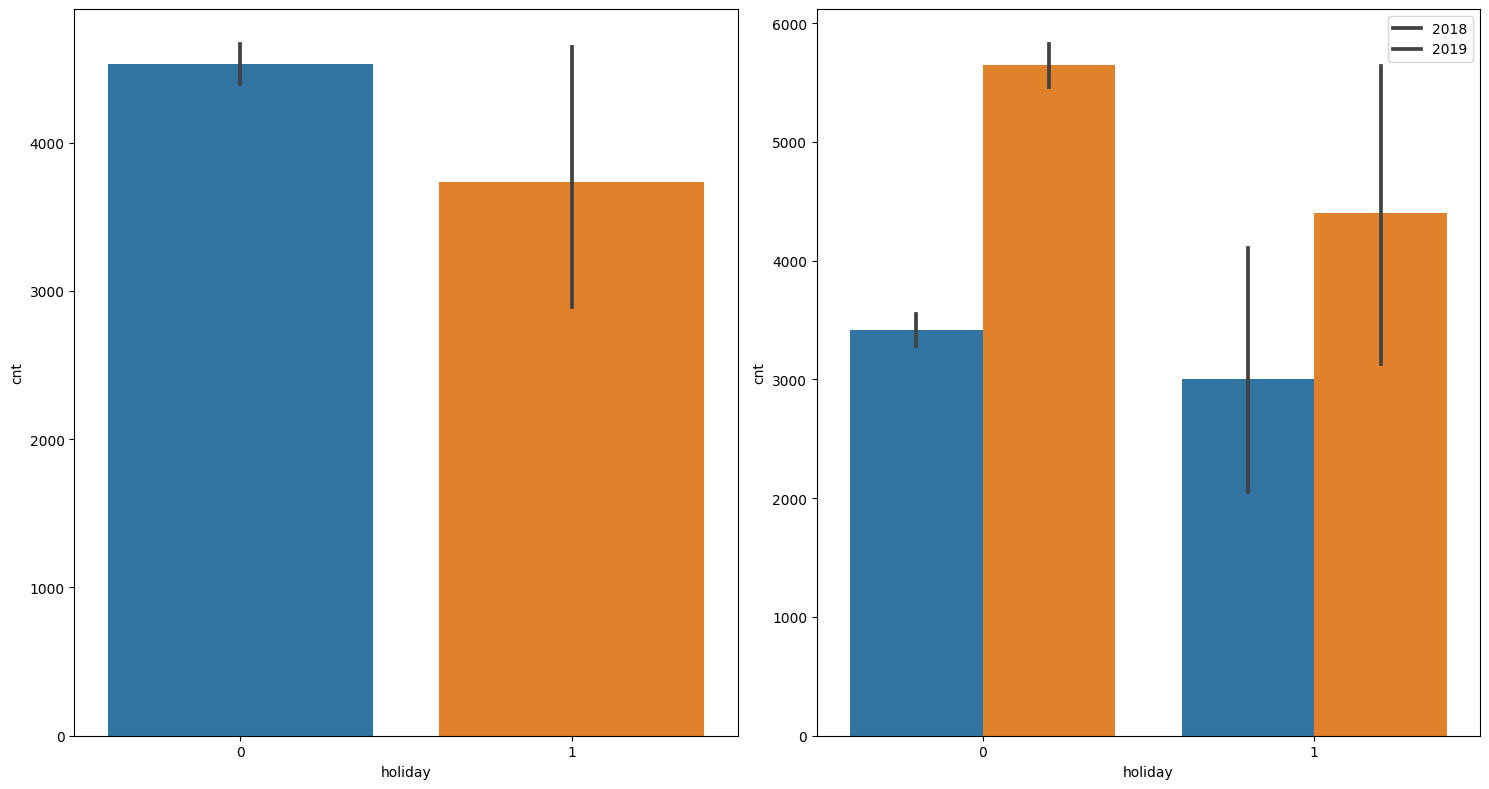

In [2279]:
plot_cat_with_target('holiday')

In [2280]:
# People like to book a bike on non holiday it may be possible people like spend more time with 
# family on holiday rather than going out. But this trend decreases from year 2018 to 2019.

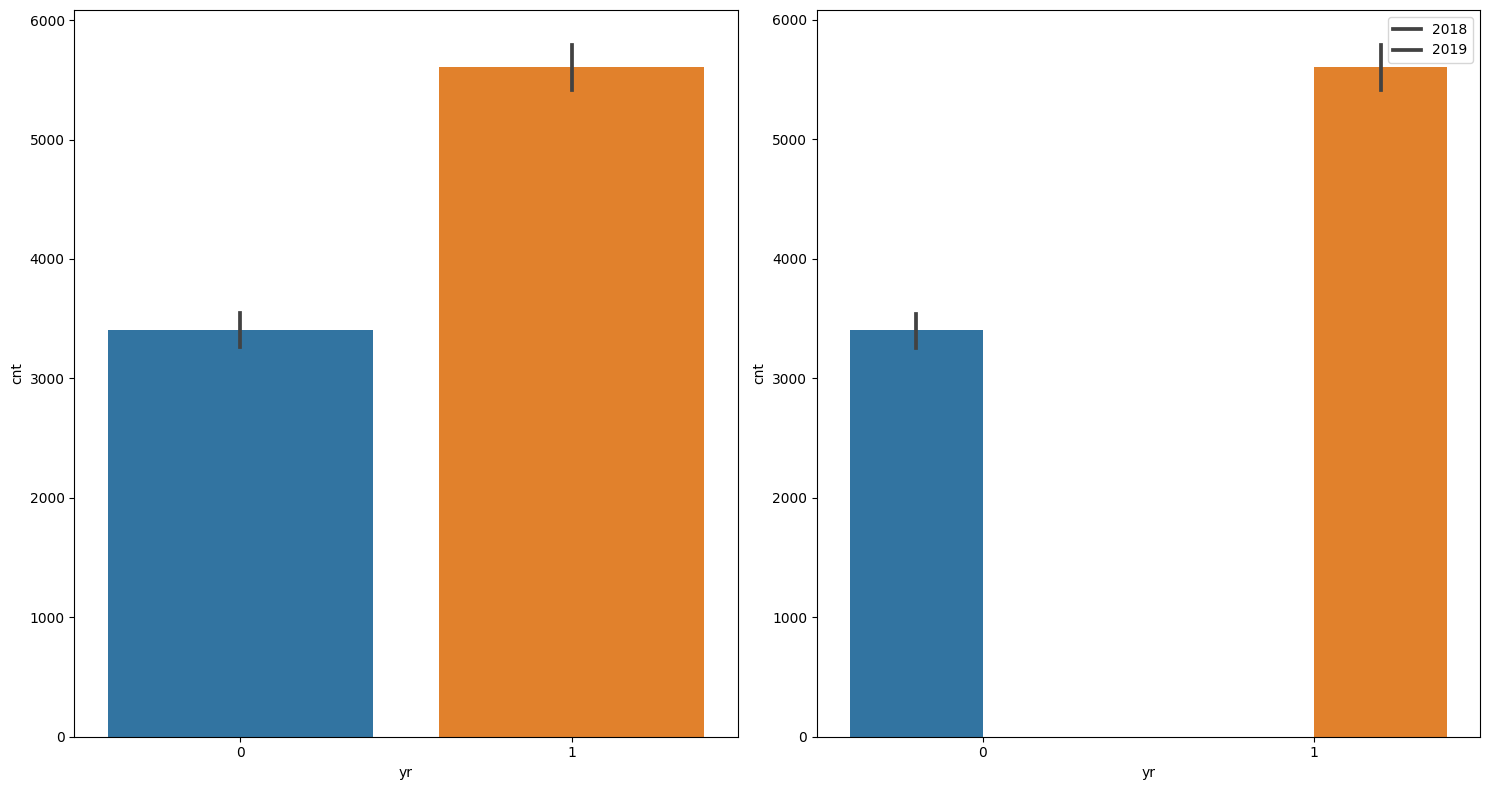

In [2281]:
plot_cat_with_target('yr')

In [2282]:
# There is more booking done in 2019 compared to 2018.

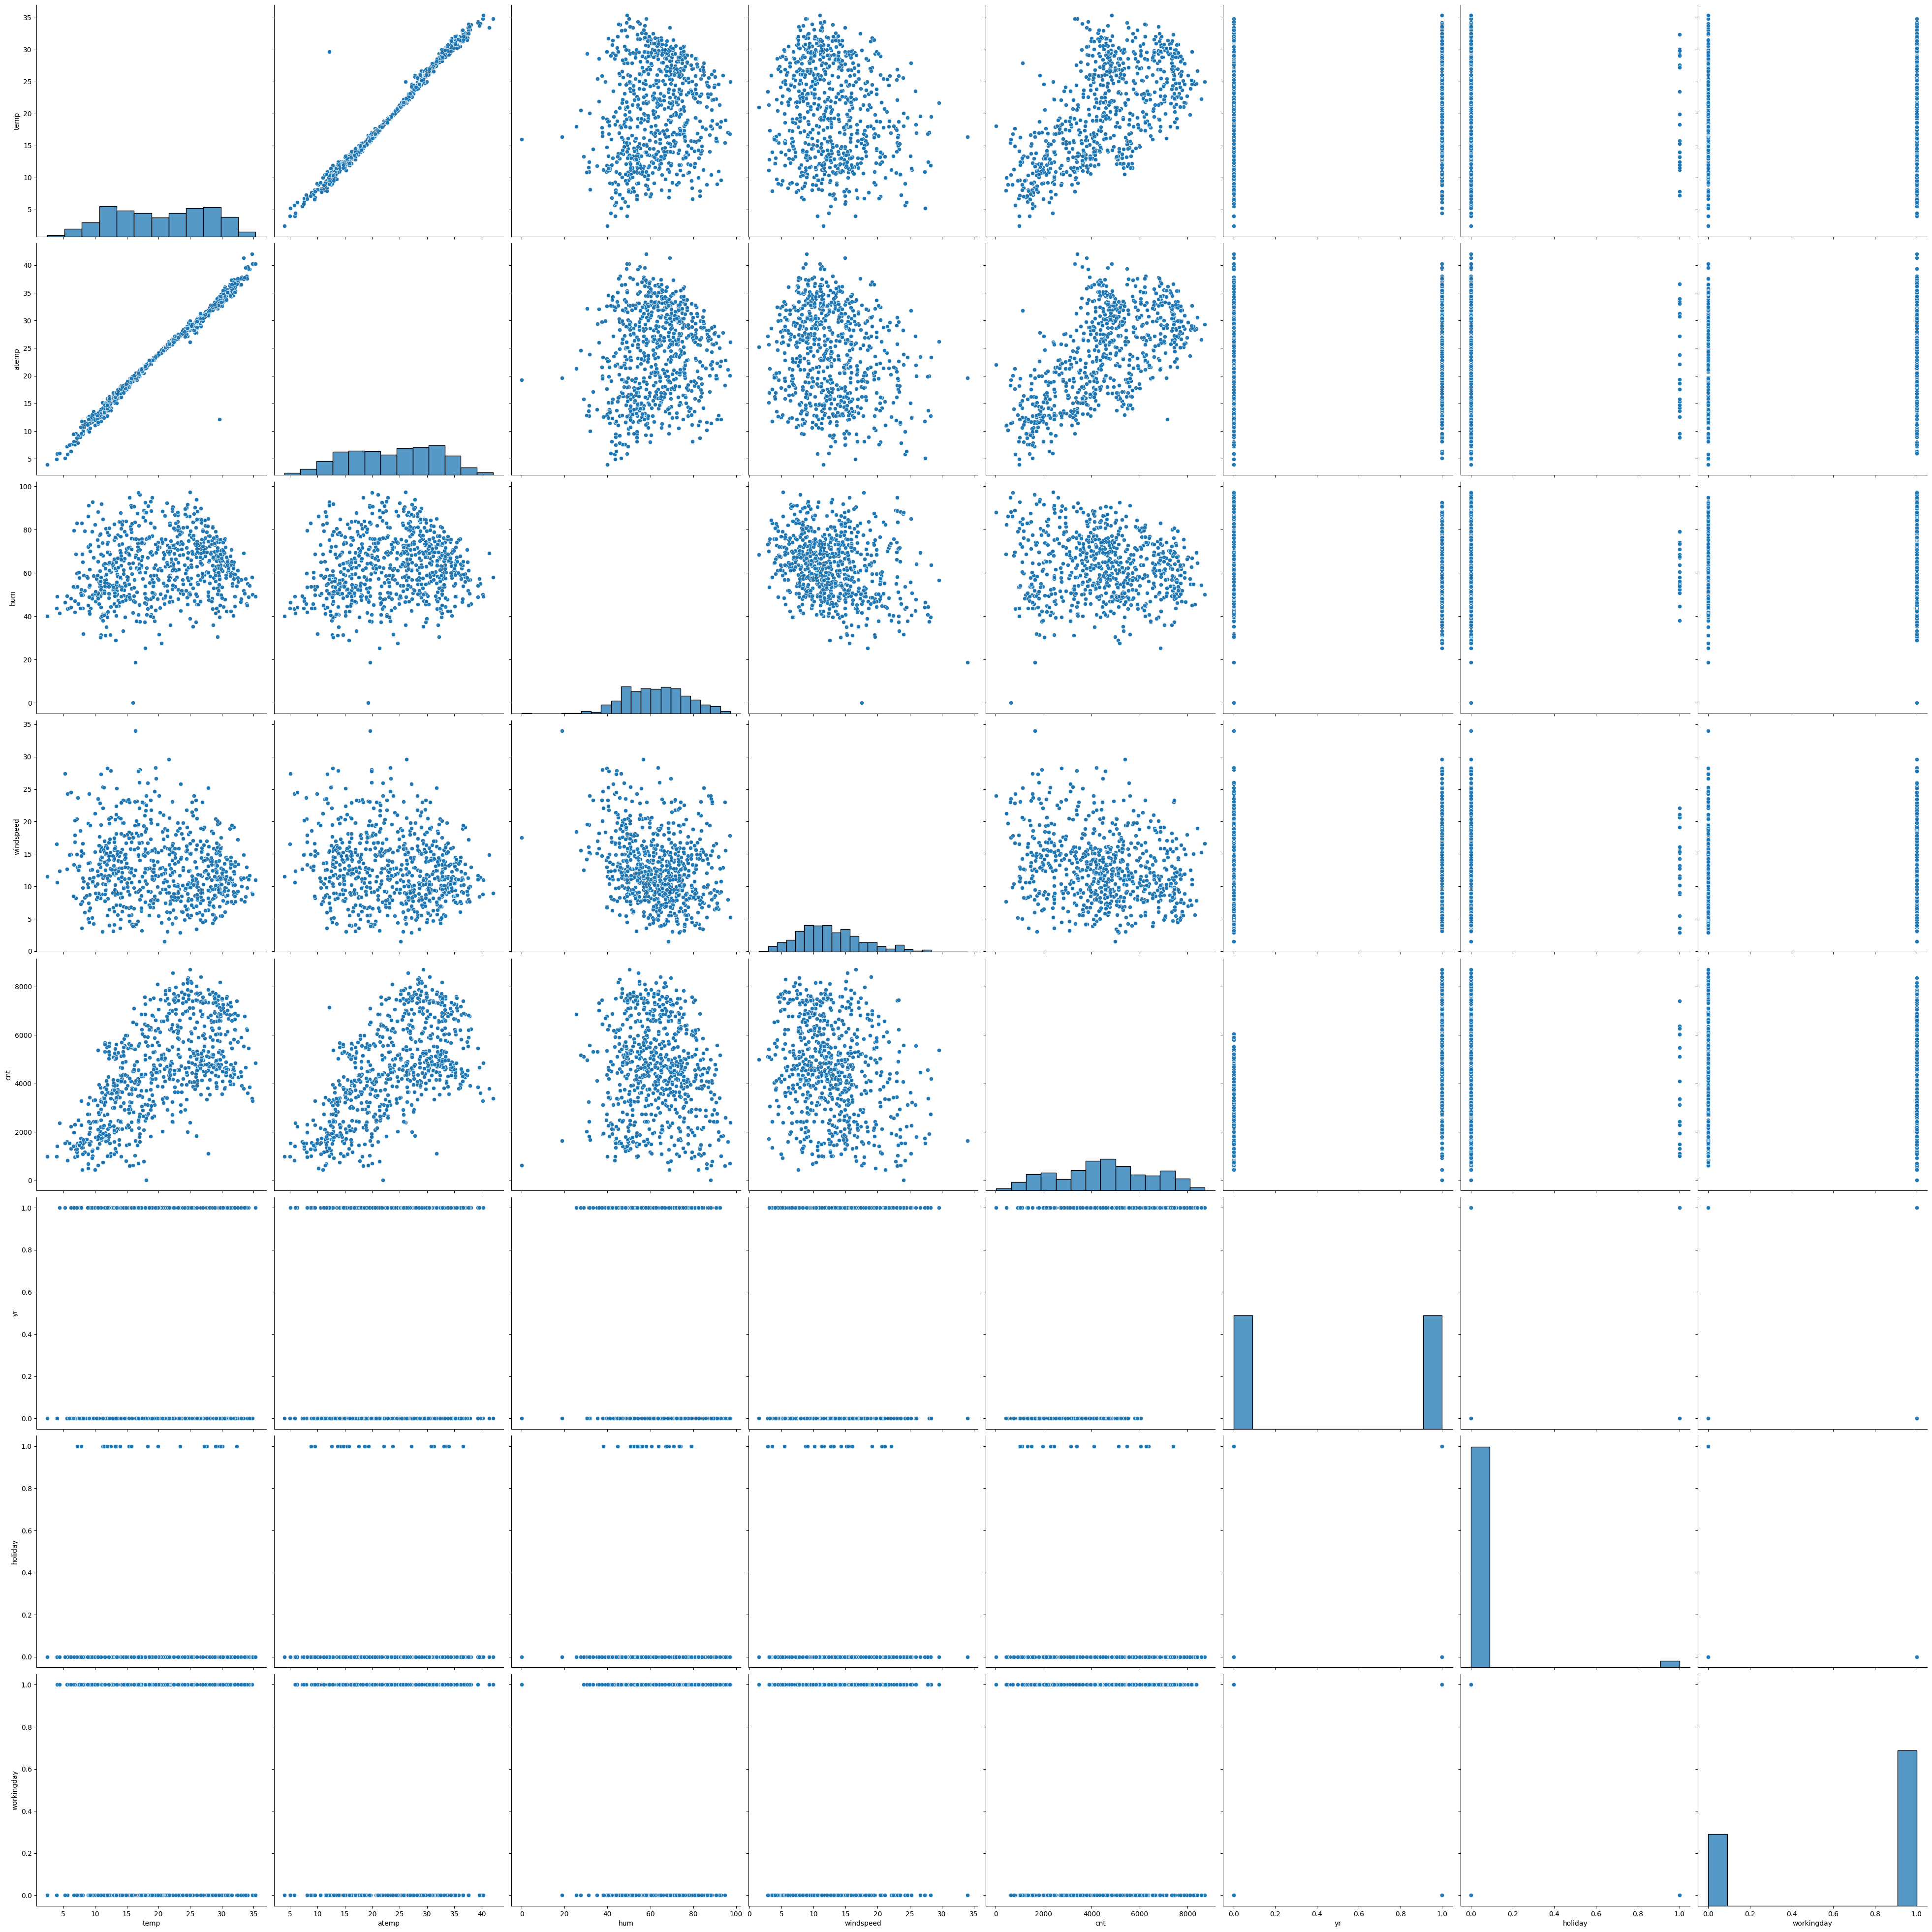

In [2283]:
sns.pairplot(df_bike_new,size=5)
plt.show()

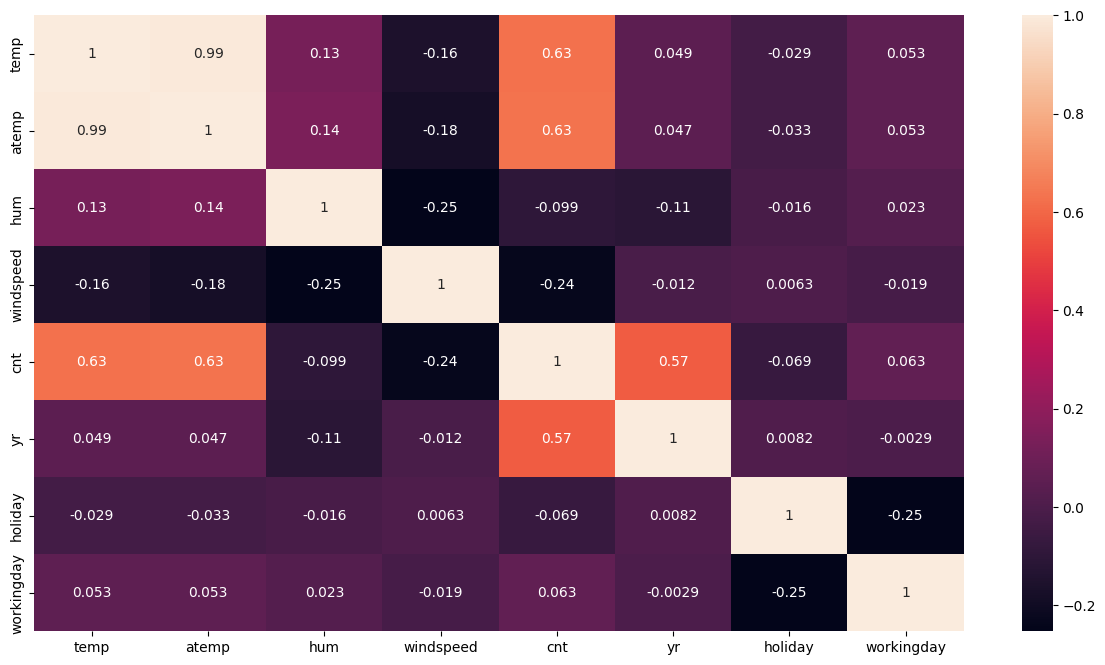

In [2284]:
plt.figure(figsize=(15,8))
sns.heatmap(df_bike_new.corr(),annot=True)
plt.show()

In [2285]:
# There is strong correlation between atemp and temp
# There is strong correlation between atemp and cnt
# There is strong correlation between temp and cnt

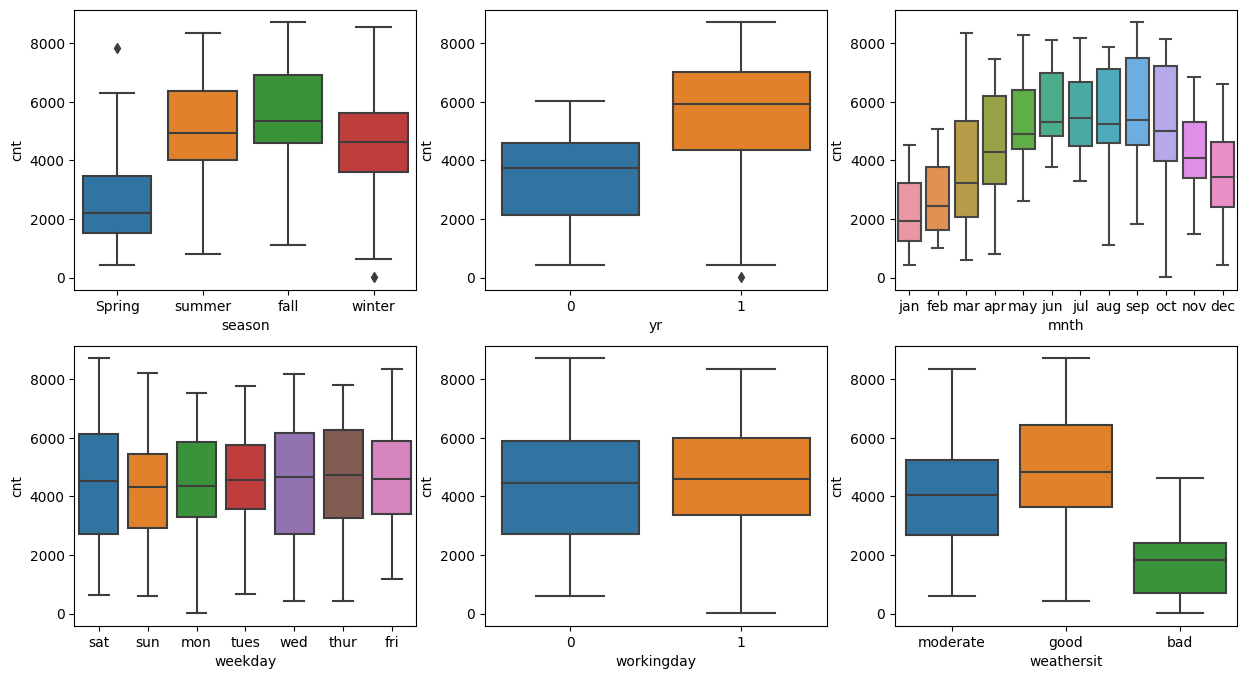

In [2286]:
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
sns.boxplot(data=df_bike_new,x='season',y='cnt')

plt.subplot(2,3,2)
sns.boxplot(data=df_bike_new,x='yr',y='cnt')

plt.subplot(2,3,3)
sns.boxplot(data=df_bike_new,x='mnth',y='cnt')


plt.subplot(2,3,4)
sns.boxplot(data=df_bike_new,x='weekday',y='cnt')

plt.subplot(2,3,5)
sns.boxplot(data=df_bike_new,x='workingday',y='cnt')

plt.subplot(2,3,6)
sns.boxplot(data=df_bike_new,x='weathersit',y='cnt')

plt.show()

In [ ]:
# Average bike booking is more in fall season compare to other season.
# Average bike booking is more in clear weather.
# Average bike booking is more in 2019 as compared to 2018.

# Step 3: Data Preparation

In [2287]:
# Convert the categorical into numerical using dummy variable

In [2288]:
df_weekday =  pd.get_dummies(data=df_bike_new['weekday'],drop_first=True)
df_mnth =  pd.get_dummies(data=df_bike_new['mnth'],drop_first=True)
df_season =  pd.get_dummies(data=df_bike_new['season'],drop_first=True)
df_weathersit =  pd.get_dummies(data=df_bike_new['weathersit'],drop_first=True)

In [2289]:
df_bike_new2 = pd.concat([df_bike_new,df_weekday,df_mnth,df_season,df_weathersit],axis=1)
df_bike_new2.head()

temp     atemp      hum  windspeed   cnt  season  yr mnth  holiday  \
0  14.110847  18.18125  80.5833  10.749882   985  Spring   0  jan        0   
1  14.902598  17.68695  69.6087  16.652113   801  Spring   0  jan        0   
2   8.050924   9.47025  43.7273  16.636703  1349  Spring   0  jan        0   
3   8.200000  10.60610  59.0435  10.739832  1562  Spring   0  jan        0   
4   9.305237  11.46350  43.6957  12.522300  1600  Spring   0  jan        0   

  weekday  ...  mar may  nov  oct  sep  fall  summer  winter  good  moderate  
0     sat  ...    0   0    0    0    0     0       0       0     0         1  
1     sun  ...    0   0    0    0    0     0       0       0     0         1  
2     mon  ...    0   0    0    0    0     0       0       0     1         0  
3    tues  ...    0   0    0    0    0     0       0       0     1         0  
4     wed  ...    0   0    0    0    0     0       0       0     1         0  

[5 rows x 34 columns]

In [2290]:
df_bike_new2.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

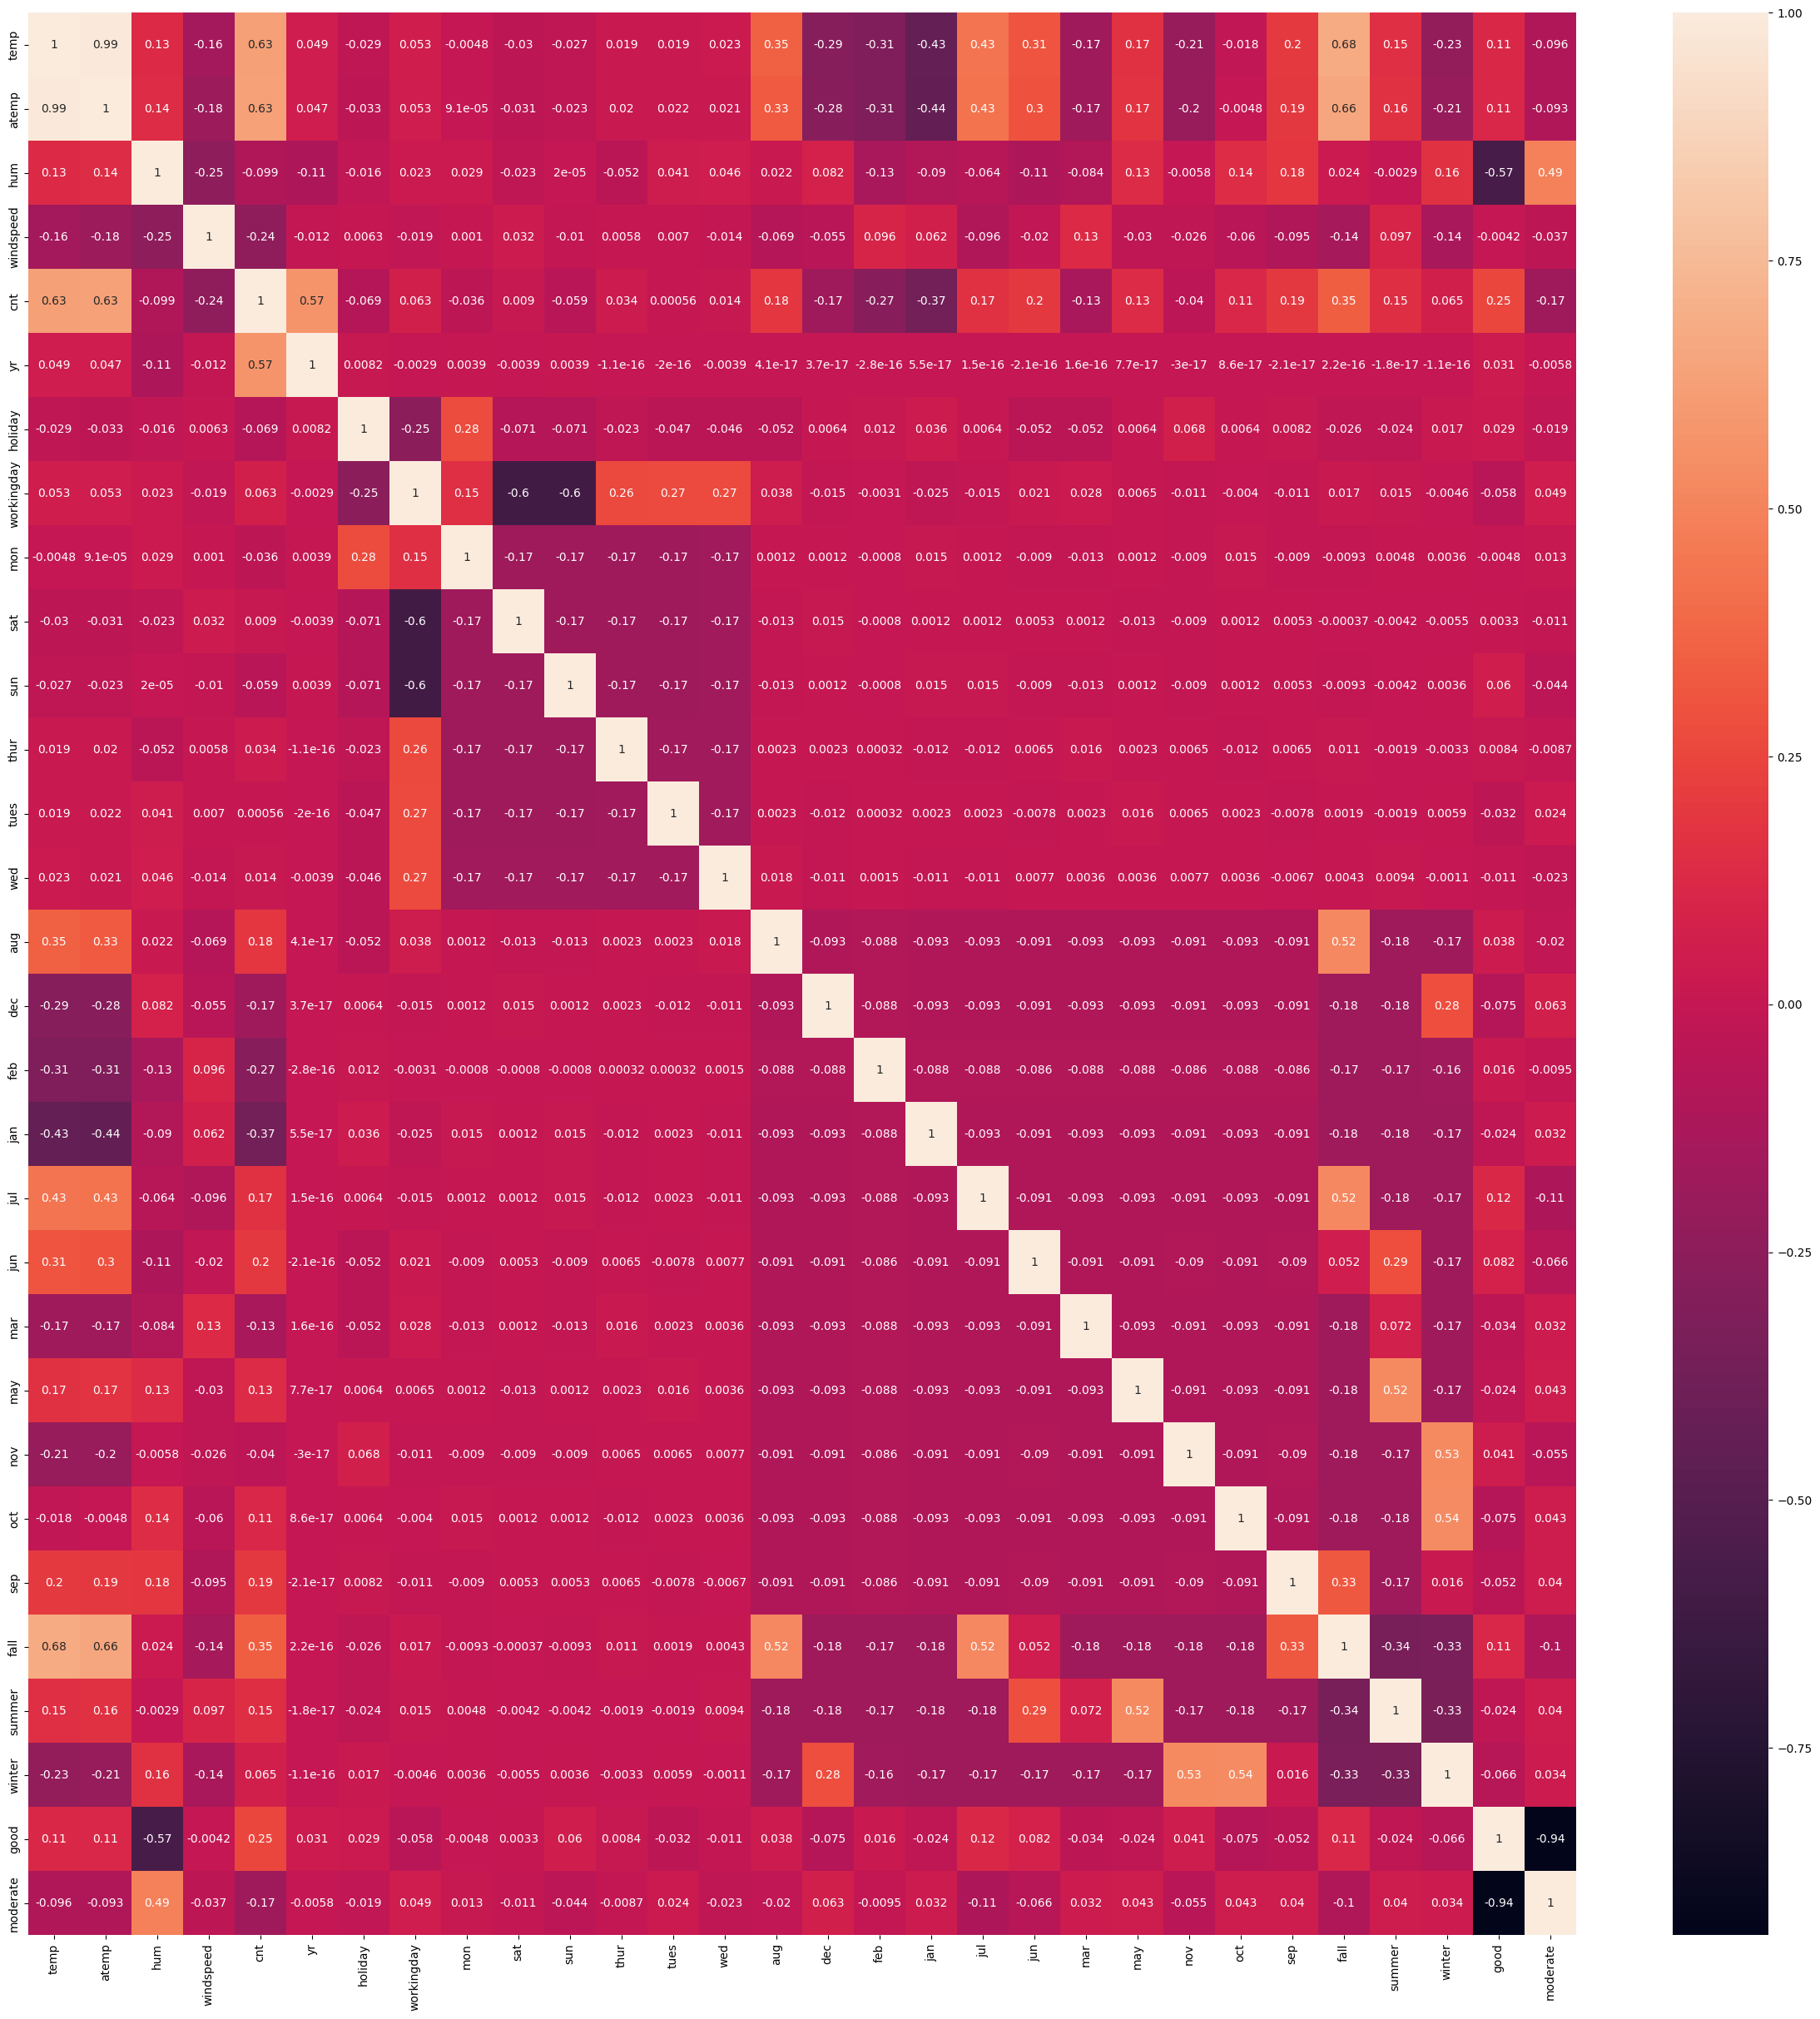

In [2291]:
plt.figure(figsize=(30,30))
sns.heatmap(df_bike_new2.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [2292]:
# Splitting the dependent variable and idenpendent variable

In [2293]:
X = df_bike_new2.drop(['cnt'],axis=1)
y = df_bike_new2['cnt']

# Step 4: Splitting the Data into Training and Testing Sets

In [2294]:
# Split in X_train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(511, 29)
(219, 29)
(511,)
(219,)


### Standardizing the numerical column

In [2295]:
col = ['temp','atemp','hum','windspeed']

scaler = StandardScaler()

X_train[col] = scaler.fit_transform(X_train[col])
X_train.head()

temp     atemp       hum  windspeed  yr  holiday  workingday  mon  \
24  -1.497889 -1.482068 -0.084828  -0.788186   0        0           1    0   
260  0.061529  0.089853  0.450519  -0.142526   0        0           0    0   
202  1.932867  2.241075 -0.335480  -0.744370   0        0           1    0   
317  0.185065  0.299075 -0.289753   1.556438   0        0           1    1   
473  0.011198  0.105258 -0.115402  -1.635152   1        0           1    0   

     sat  sun  ...  mar  may  nov  oct  sep  fall  summer  winter  good  \
24     0    0  ...    0    0    0    0    0     0       0       0     0   
260    0    1  ...    0    0    0    0    1     1       0       0     1   
202    0    0  ...    0    0    0    0    0     1       0       0     1   
317    0    0  ...    0    0    1    0    0     0       0       1     1   
473    0    0  ...    0    0    0    0    0     0       1       0     1   

     moderate  
24          1  
260         0  
202         0  
317         0  
473         0  

[5 rows x 29 columns]

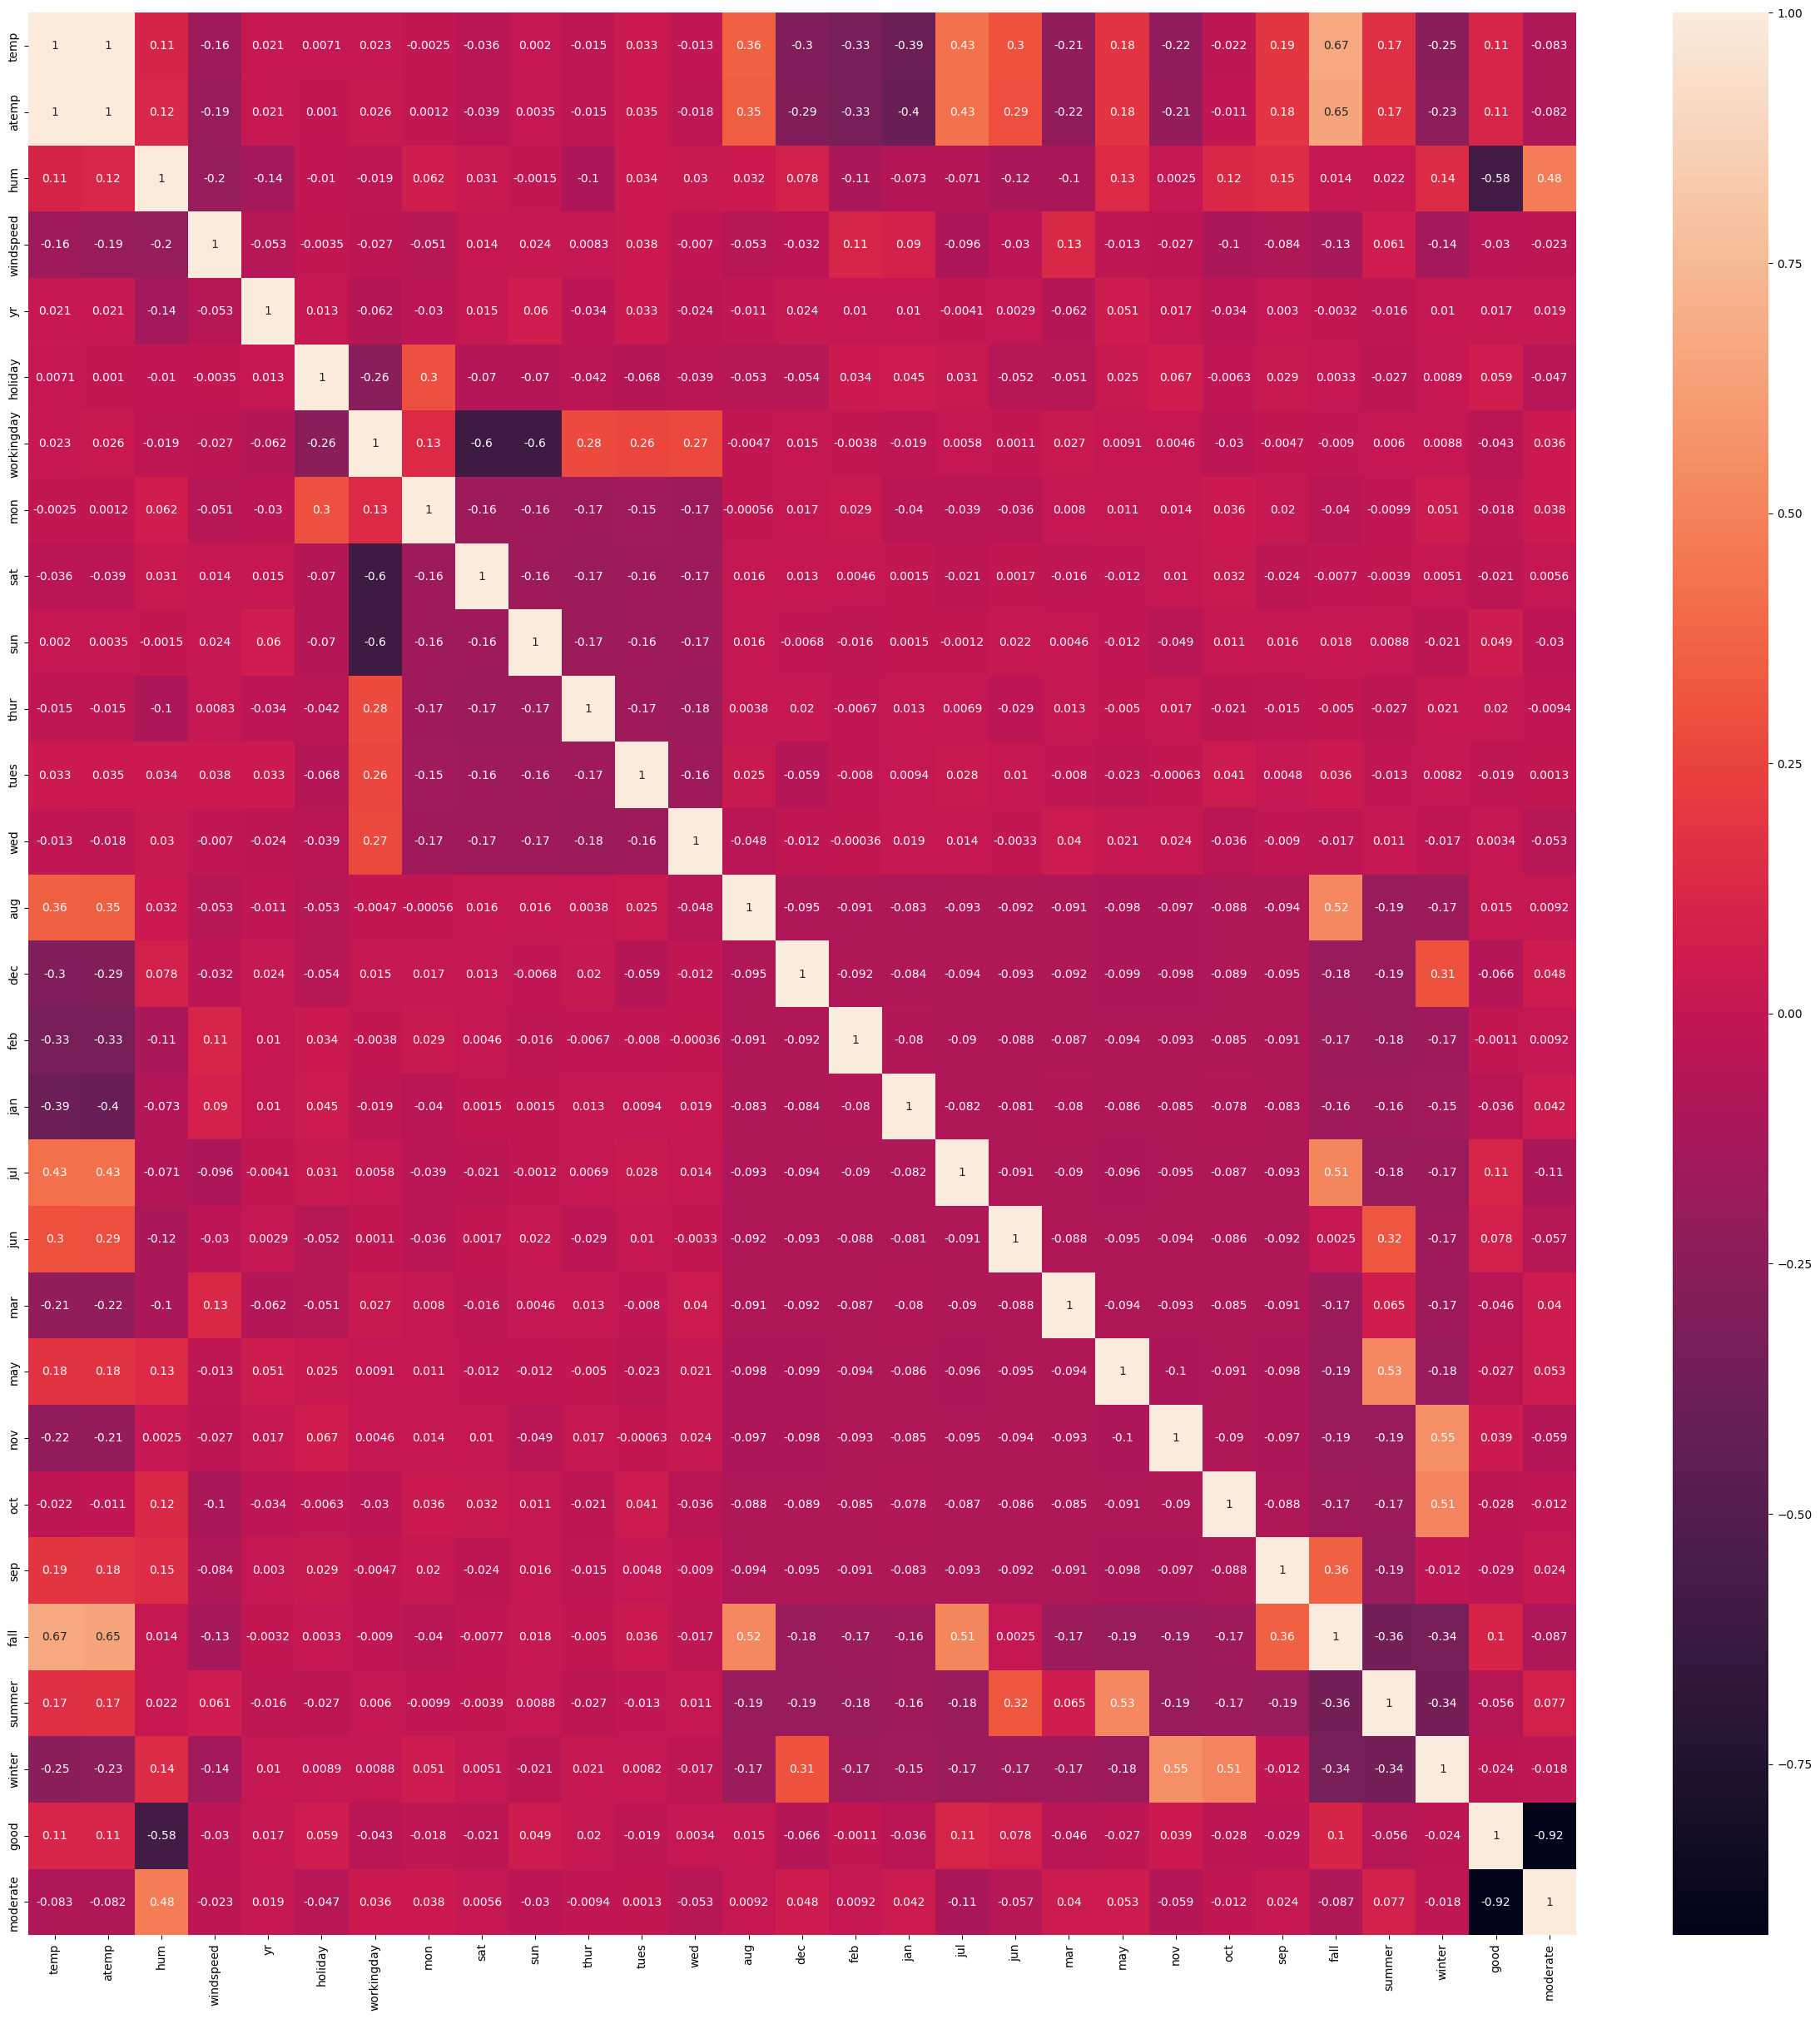

In [2296]:
plt.figure(figsize = (30, 30)) 
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [2297]:
# There is chance for multicolinearity

In [2298]:
# Base model

In [2299]:
# Building with RFE

In [2300]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(estimator=lr,n_features_to_select=15)

rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 3),
 ('windspeed', False, 4),
 ('yr', True, 1),
 ('holiday', False, 8),
 ('workingday', True, 1),
 ('mon', True, 1),
 ('sat', True, 1),
 ('sun', False, 9),
 ('thur', False, 15),
 ('tues', False, 12),
 ('wed', False, 14),
 ('aug', False, 11),
 ('dec', False, 6),
 ('feb', False, 13),
 ('jan', False, 7),
 ('jul', True, 1),
 ('jun', False, 10),
 ('mar', True, 1),
 ('may', False, 2),
 ('nov', False, 5),
 ('oct', True, 1),
 ('sep', True, 1),
 ('fall', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('good', True, 1),
 ('moderate', True, 1)]

In [2301]:
def build_lr_ols_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

In [2302]:
def find_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Columns'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [2303]:
signi_list = X_train.columns[rfe.support_].to_list()
signi_list


['temp',
 'atemp',
 'yr',
 'workingday',
 'mon',
 'sat',
 'jul',
 'mar',
 'oct',
 'sep',
 'fall',
 'summer',
 'winter',
 'good',
 'moderate']

In [2304]:
 X_train.columns[~rfe.support_]

Index(['hum', 'windspeed', 'holiday', 'sun', 'thur', 'tues', 'wed', 'aug',
       'dec', 'feb', 'jan', 'jun', 'may', 'nov'],
      dtype='object')

# Step 5: Building a linear model

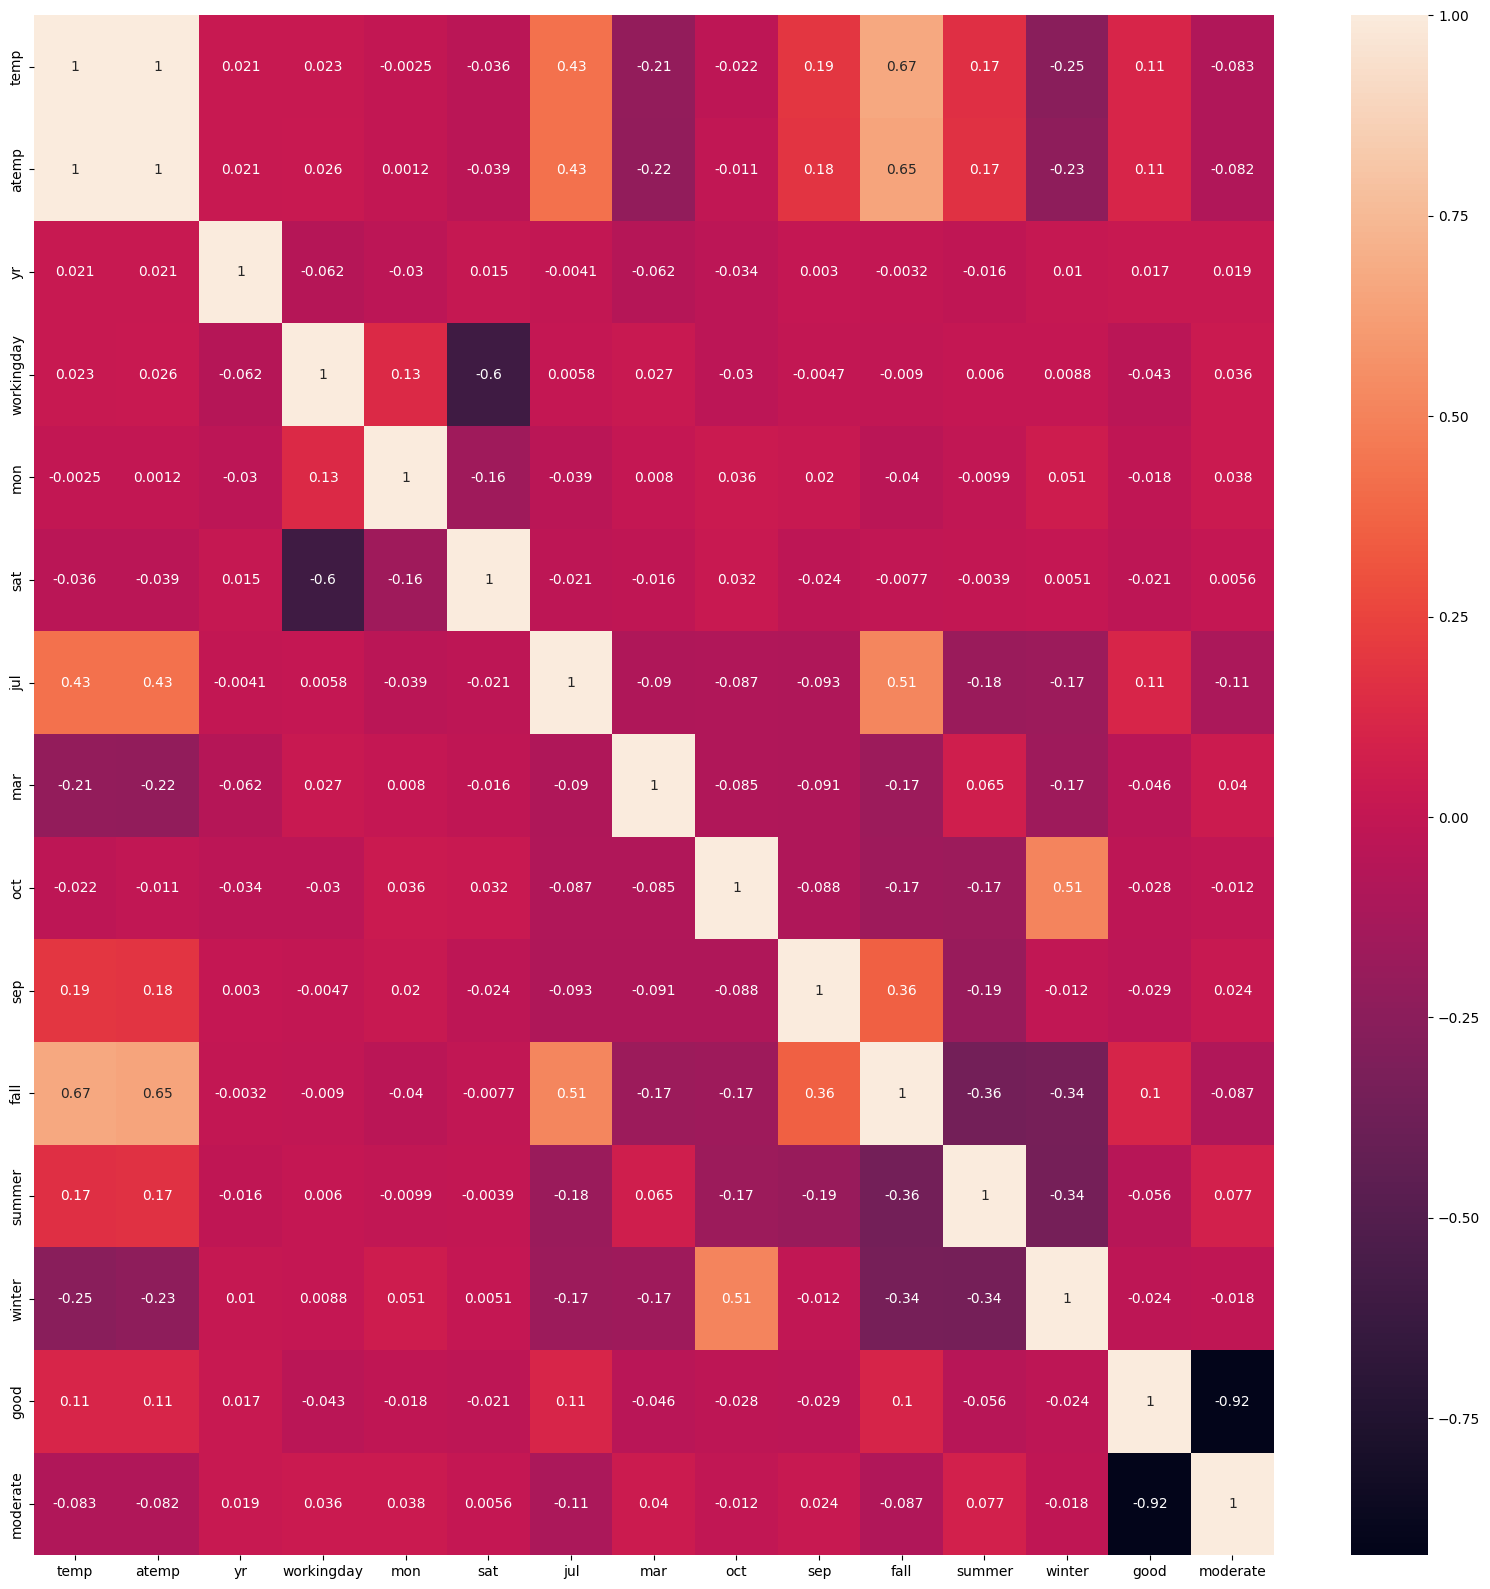

In [2305]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[signi_list].corr(),annot=True);

In [2306]:
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     156.7
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          6.14e-177
Time:                        22:15:40   Log-Likelihood:                -4142.4
No. Observations:                 511   AIC:                             8317.
Df Residuals:                     495   BIC:                             8385.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.5787    244.172      0.654      0.5

In [2308]:
signi_list.remove('atemp')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     166.1
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          6.43e-177
Time:                        22:15:40   Log-Likelihood:                -4145.2
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     496   BIC:                             8384.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.7956    243.931      0.417      0.6

In [2310]:
signi_list.remove('jul')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     178.3
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          1.33e-177
Time:                        22:15:41   Log-Likelihood:                -4146.2
No. Observations:                 511   AIC:                             8320.
Df Residuals:                     497   BIC:                             8380.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.8650    243.432      0.303      0.7

In [2312]:
signi_list.remove('mar')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     192.1
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          4.66e-178
Time:                        22:15:41   Log-Likelihood:                -4147.9
No. Observations:                 511   AIC:                             8322.
Df Residuals:                     498   BIC:                             8377.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.2218    241.867      0.543      0.5

In [2315]:
signi_list.remove('fall')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     199.1
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          1.49e-174
Time:                        22:15:43   Log-Likelihood:                -4159.0
No. Observations:                 511   AIC:                             8342.
Df Residuals:                     499   BIC:                             8393.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        612.7561    223.623      2.740      0.0

In [2316]:
signi_list.remove('mon')
build_lr_ols_model(signi_list)
find_vif(signi_list)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     216.3
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          1.79e-174
Time:                        22:15:43   Log-Likelihood:                -4161.9
No. Observations:                 511   AIC:                             8346.
Df Residuals:                     500   BIC:                             8392.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.0749    224.690      2.697      0.0

In [2318]:
signi_list

['temp',
 'yr',
 'workingday',
 'sat',
 'oct',
 'sep',
 'summer',
 'winter',
 'good',
 'moderate']

In [2320]:
# above list of variable are most significant of all
# We have remove the multicolinearity as all VIF is less than 5.

In [2321]:
model  = build_lr_ols_model(signi_list)
model.params

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     216.3
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          1.79e-174
Time:                        22:15:44   Log-Likelihood:                -4161.9
No. Observations:                 511   AIC:                             8346.
Df Residuals:                     500   BIC:                             8392.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.0749    224.690      2.697      0.0

const          606.074942
temp          1110.915055
yr            2068.137837
workingday     402.332352
sat            355.375484
oct            434.287454
sep            946.009467
summer         770.313888
winter        1077.941157
good          2265.612910
moderate      1580.612807
dtype: float64

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train[signi_list].corr(),annot=True);

# Step 6: Residual Analysis of the train data and validation

# Test of normality

-0.7747942083494129


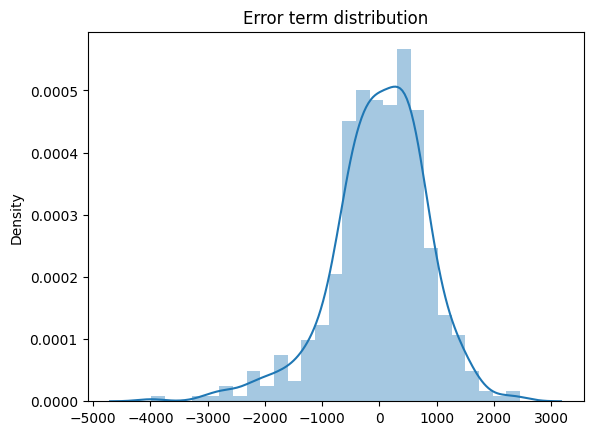

In [2322]:
print(model.resid.skew())
sns.distplot(model.resid)
plt.title('Error term distribution')
plt.show()

In [2323]:
# Error is almost normally distribution let try sqrt transformation and see

0.1267929494871738


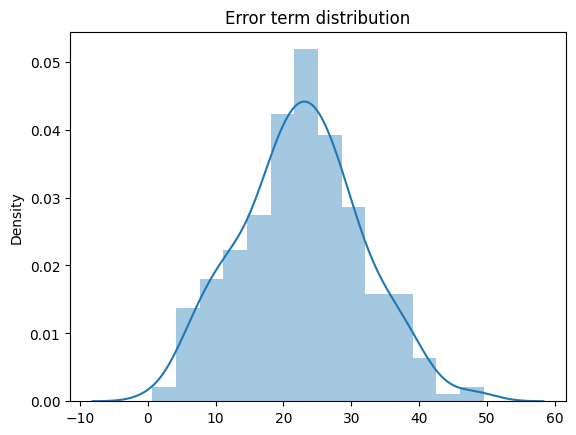

In [2324]:
print(np.sqrt(model.resid).skew())
sns.distplot(np.sqrt(model.resid))
plt.title('Error term distribution')
plt.show()

# Linearity test

In [2325]:
# We can see that varible are linearly dependent

In [2326]:
X_train_sm = sm.add_constant(X_train[signi_list])

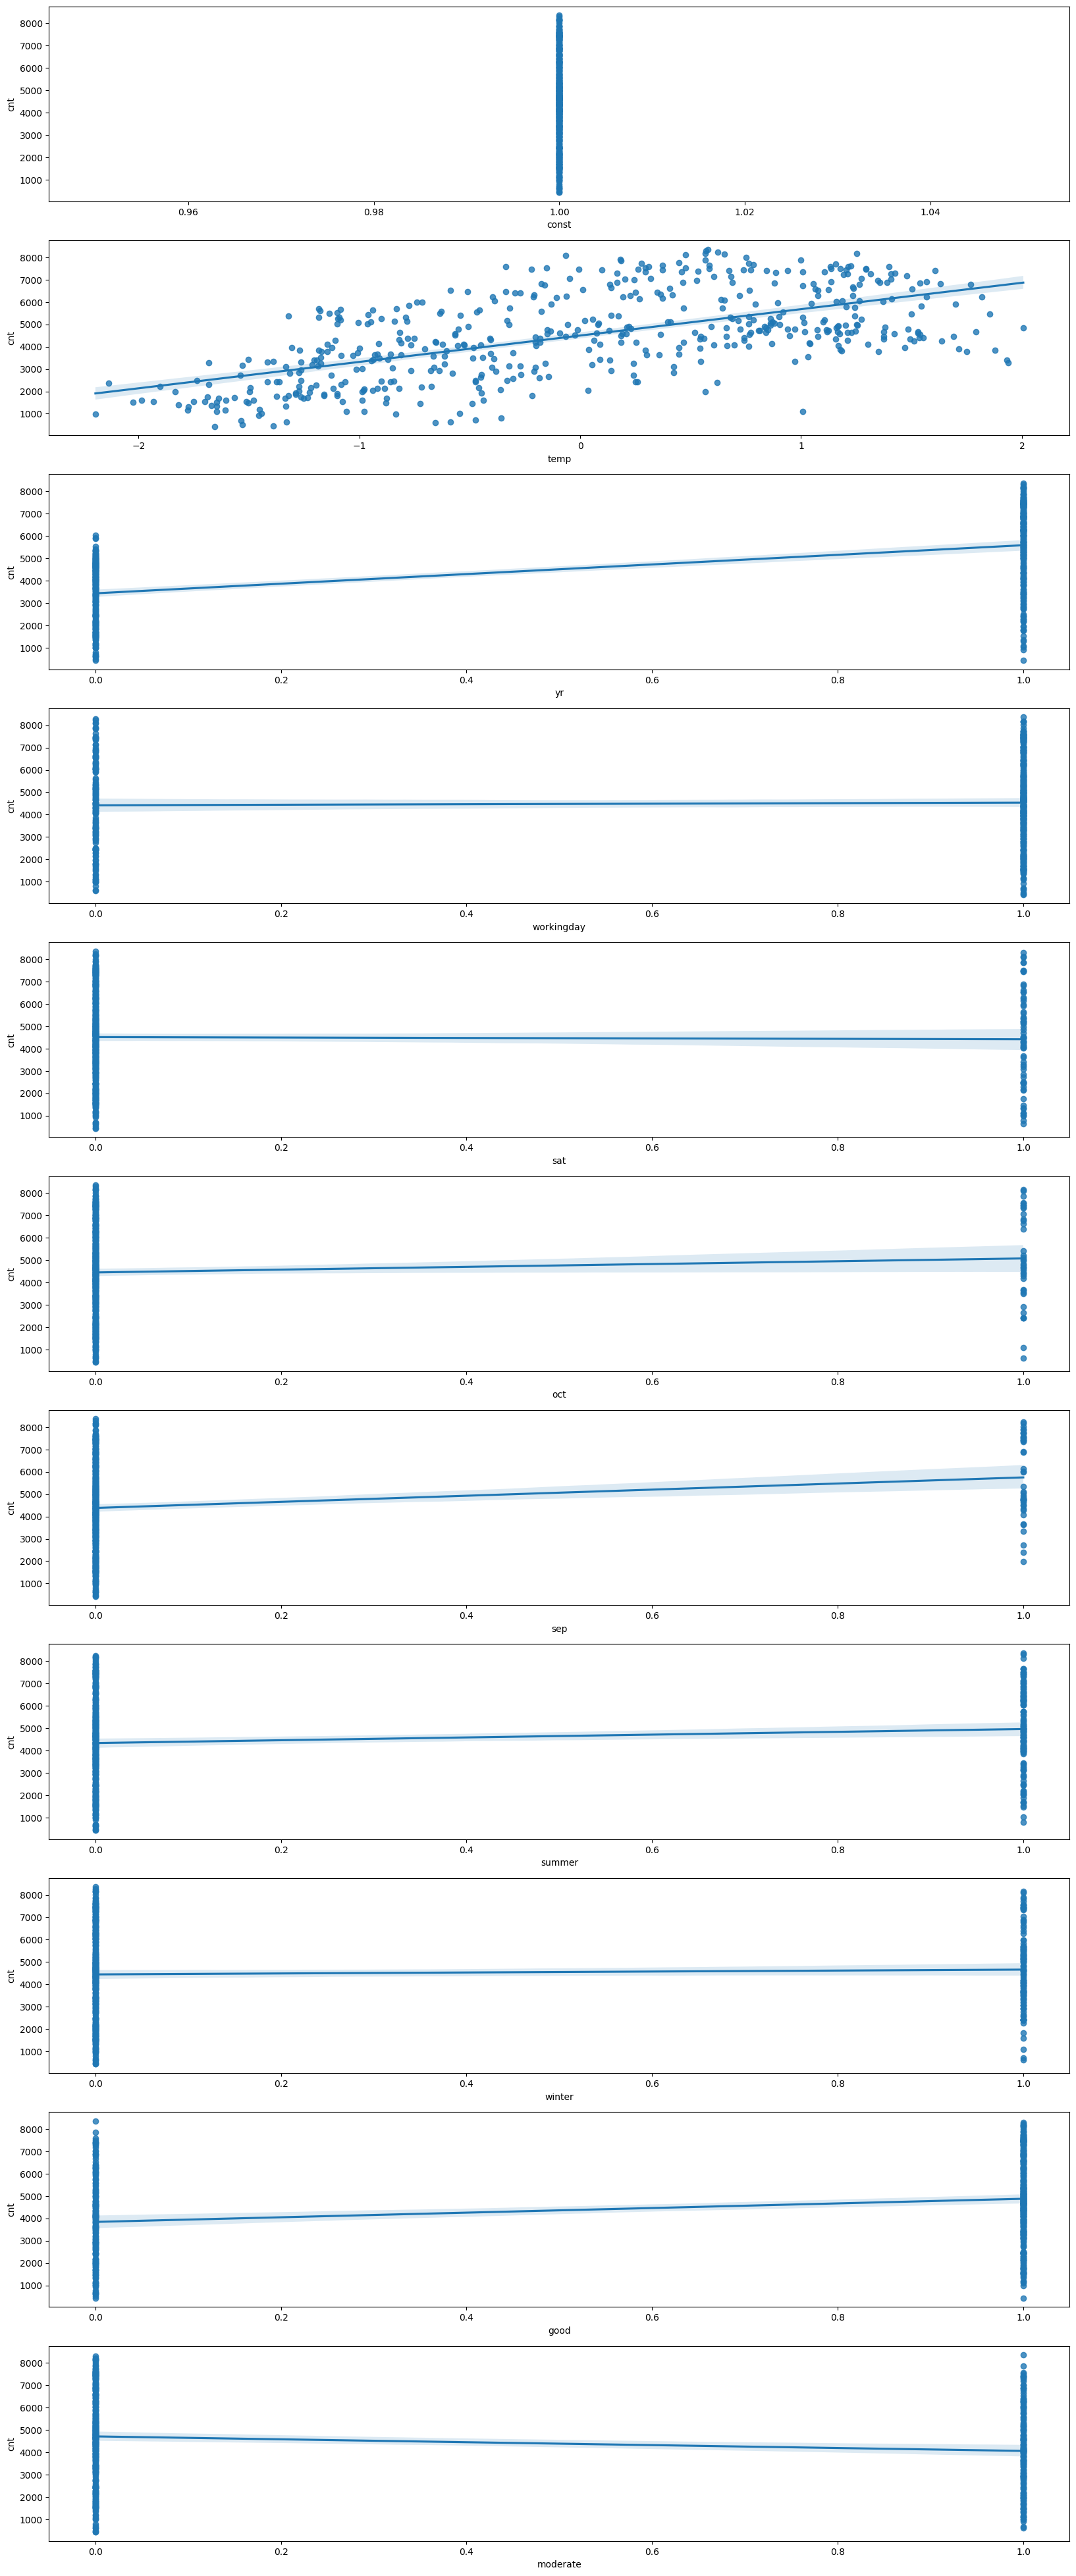

In [2327]:
col1 = X_train_sm.columns
plt.figure(figsize=(20,50))
for i in range(col1.shape[0]):
    plt.subplot(col1.shape[0],1,i+1)
    sns.regplot(x = X_train_sm[col1[i]],y=y_train)
    plt.xlabel(col1[i])
plt.show()

# Homoscedasticity

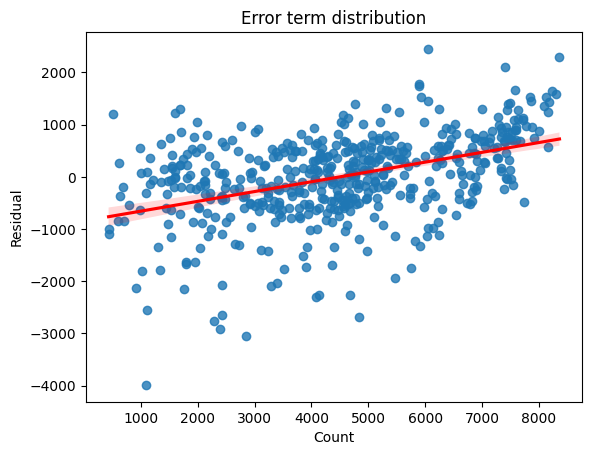

In [2328]:
sns.regplot(x=y_train,y=model.resid,line_kws={'color':'red'})
plt.title('Error term distribution')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [2329]:
# No visible pattern observed from above plot for residuals

In [2330]:
# Durbin-Watson is 2.082 so there is no autocorrelation.

# Step 7: Making Predictions Using the Final Model

In [2331]:
X_test_copy = X_test.copy()
X_test_copy[col] = scaler.transform(X_test_copy[col])
X_test_copy.head()

temp     atemp       hum  windspeed  yr  holiday  workingday  mon  \
283  0.386384  0.430988  1.230803  -0.612525   0        0           1    0   
453 -0.693412 -0.615737 -0.332626  -0.678500   1        0           1    0   
266  0.606004  0.543449  1.599509  -1.469993   0        0           0    0   
269  0.770718  0.605544  1.756712  -0.942350   0        0           1    0   
120 -0.245021 -0.170074  0.910684  -1.099061   0        0           0    0   

     sat  sun  ...  mar  may  nov  oct  sep  fall  summer  winter  good  \
283    0    0  ...    0    0    0    1    0     0       0       1     0   
453    0    0  ...    1    0    0    0    0     0       1       0     0   
266    1    0  ...    0    0    0    0    1     0       0       1     0   
269    0    0  ...    0    0    0    0    1     0       0       1     0   
120    0    1  ...    0    1    0    0    0     0       1       0     0   

     moderate  
283         1  
453         1  
266         1  
269         1  
120         1  

[5 rows x 29 columns]

In [2332]:
X_test_signi = X_test_copy[signi_list]
X_test_signi.head(2)

temp  yr  workingday  sat  oct  sep  summer  winter  good  moderate
283  0.386384   0           1    0    1    0       0       1     0         1
453 -0.693412   1           1    0    0    0       1       0     0         1

In [2333]:
y_pred_train = model.predict(X_train_sm)

In [2334]:
r2_score(y_train,y_pred_train)

0.8122683211148842

In [2335]:
X_test_sm = sm.add_constant(X_test_signi)
y_pred_test = model.predict(X_test_sm)

In [2336]:
r2_score(y_test,y_pred_test)

0.8291606386466895

# Step 8: Model Evaluation

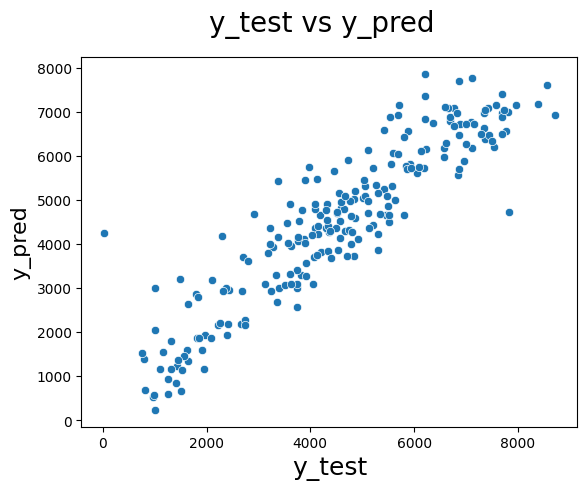

In [2337]:
fig = plt.figure()
sns.scatterplot(x=y_test, y=y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [2338]:
round(model.params,4)

const          606.0749
temp          1110.9151
yr            2068.1378
workingday     402.3324
sat            355.3755
oct            434.2875
sep            946.0095
summer         770.3139
winter        1077.9412
good          2265.6129
moderate      1580.6128
dtype: float64

In [2339]:
# Adjuested r2
model.rsquared_adj

0.8085136875371819

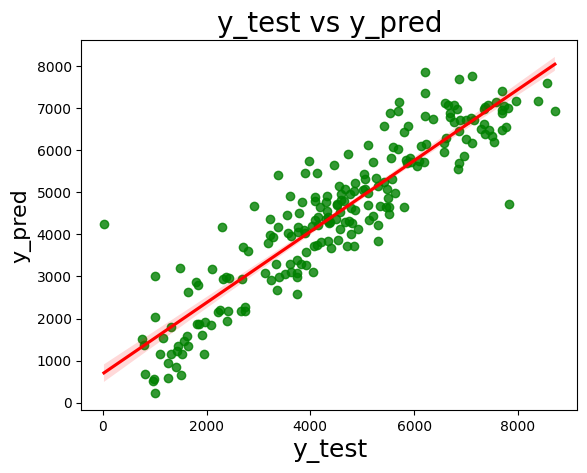

In [2340]:
plt.figure()
sns.regplot(x=y_test, y=y_pred_test, ci=81, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Step 9: Conclusion

In [2341]:
# We can see that r2 score for train and test are close together so we can say that our final model is good
# below variable are significant
print('Significant Variables are ',signi_list)

Significant Variables are  ['temp', 'yr', 'workingday', 'sat', 'oct', 'sep', 'summer', 'winter', 'good', 'moderate']
